In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
import geopandas as gpd
import math
import matplotlib.gridspec as gridspec

In [2]:
# Import dataset 
gdp = pd.read_csv(r"C:\Users\btdjf\Desktop\Ironhack 2\Final Bootcamp Project\Final-Bootcamp-Project\Datasets\countries of the world.csv")
gdp

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223           NaN                                NaN                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222          NaN             145,2       16,9     18,97     64,13       3   
223          NaN               NaN       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27         NaN      NaN     NaN  
4        8,71      6,25         NaN      NaN     NaN  
..        ...      

In [3]:
# Checking a summary of the df to understand the structure and content of the dataset, as nul values, and data types
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
# Display option to show all rows of the dataset
pd.set_option('display.max_rows', None)
print(gdp)

                               Country                               Region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA     

In [5]:
# Rename columns to lower letters, and replace spaces
cols = []
for i in range(len(gdp.columns)):
    cols.append(gdp.columns[i].lower().replace(' ', ''))
gdp.columns = cols
gdp

country                               region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA                               
12                            Austria   WESTERN EUROPE                        
13                         Azerbaijan                  C.W. OF IND. STATES    
14                       Bahamas, The               LATIN AMER. & CARIB       
15                            Bahrain   NEAR EAST                             
16                         Bangladesh         ASIA (EX. NEAR EAST)            
17                           Barbados               LATIN AMER. & CARIB       
18                            Belarus                  C.W. OF IND. STATES    
19                            Belgium   WESTERN EUROPE                        
20                             Belize               LATIN AMER. & CARIB       
21                              Benin   SUB-SAHARAN AFRICA                    
22                            Bermuda   NORTHERN AMERICA                      
23                             Bhutan         ASIA (EX. NEAR EAST)            
24                            Bolivia               LATIN AMER. & CARIB       
25               Bosnia & Herzegovina   EASTERN EUROPE                        
26                           Botswana   SUB-SAHARAN AFRICA                    
27                             Brazil               LATIN AMER. & CARIB       
28                 British Virgin Is.               LATIN AMER. & CARIB       
29                             Brunei         ASIA (EX. NEAR EAST)            
30                           Bulgaria   EASTERN EUROPE                        
31                       Burkina Faso   SUB-SAHARAN AFRICA                    
32                              Burma         ASIA (EX. NEAR EAST)            
33                            Burundi   SUB-SAHARAN AFRICA                    
34                           Cambodia         ASIA (EX. NEAR EAST)            
35                           Cameroon   SUB-SAHARAN AFRICA                    
36                             Canada   NORTHERN AMERICA                      
37                         Cape Verde   SUB-SAHARAN AFRICA                    
38                     Cayman Islands               LATIN AMER. & CARIB       
39               Central African Rep.   SUB-SAHARAN AFRICA                    
40                               Chad   SUB-SAHARAN AFRICA                    
41                              Chile               LATIN AMER. & CARIB       
42                              China         ASIA (EX. NEAR EAST)            
43                           Colombia               LATIN AMER. & CARIB       
44                            Comoros   SUB-SAHARAN AFRICA                    
45                   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                    
46               Congo, Repub. of the   SUB-SAHARAN AFRICA                    
47                       Cook Islands   OCEANIA                               
48                         Costa Rica               LATIN AMER. & CARIB       
49                      Cote d'Ivoire   SUB-SAHARAN AFRICA                    
50

In [6]:
# Changing the name of the features and taking off special characters
gdp.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])
gdp

country                               region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA                               
12                            Austria   WESTERN EUROPE                        
13                         Azerbaijan                  C.W. OF IND. STATES    
14                       Bahamas, The               LATIN AMER. & CARIB       
15                            Bahrain   NEAR EAST                             
16                         Bangladesh         ASIA (EX. NEAR EAST)            
17                           Barbados               LATIN AMER. & CARIB       
18                            Belarus                  C.W. OF IND. STATES    
19                            Belgium   WESTERN EUROPE                        
20                             Belize               LATIN AMER. & CARIB       
21                              Benin   SUB-SAHARAN AFRICA                    
22                            Bermuda   NORTHERN AMERICA                      
23                             Bhutan         ASIA (EX. NEAR EAST)            
24                            Bolivia               LATIN AMER. & CARIB       
25               Bosnia & Herzegovina   EASTERN EUROPE                        
26                           Botswana   SUB-SAHARAN AFRICA                    
27                             Brazil               LATIN AMER. & CARIB       
28                 British Virgin Is.               LATIN AMER. & CARIB       
29                             Brunei         ASIA (EX. NEAR EAST)            
30                           Bulgaria   EASTERN EUROPE                        
31                       Burkina Faso   SUB-SAHARAN AFRICA                    
32                              Burma         ASIA (EX. NEAR EAST)            
33                            Burundi   SUB-SAHARAN AFRICA                    
34                           Cambodia         ASIA (EX. NEAR EAST)            
35                           Cameroon   SUB-SAHARAN AFRICA                    
36                             Canada   NORTHERN AMERICA                      
37                         Cape Verde   SUB-SAHARAN AFRICA                    
38                     Cayman Islands               LATIN AMER. & CARIB       
39               Central African Rep.   SUB-SAHARAN AFRICA                    
40                               Chad   SUB-SAHARAN AFRICA                    
41                              Chile               LATIN AMER. & CARIB       
42                              China         ASIA (EX. NEAR EAST)            
43                           Colombia               LATIN AMER. & CARIB       
44                            Comoros   SUB-SAHARAN AFRICA                    
45                   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                    
46               Congo, Repub. of the   SUB-SAHARAN AFRICA                    
47                       Cook Islands   OCEANIA                               
48                         Costa Rica               LATIN AMER. & CARIB       
49                      Cote d'Ivoire   SUB-SAHARAN AFRICA                    
50

In [7]:
# Checking the columns of the dataset
gdp.columns

Index(['country', 'region', 'population', 'area', 'density',
       'coastline_area_ratio', 'net_migration', 'infant_mortality',
       'gdp_per_capita', 'literacy', 'phones', 'arable', 'crops', 'other',
       'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

In [8]:
# Checking the unique values for the country column
gdp['country'].unique()

array(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ',
       'Andorra ', 'Angola ', 'Anguilla ', 'Antigua & Barbuda ',
       'Argentina ', 'Armenia ', 'Aruba ', 'Australia ', 'Austria ',
       'Azerbaijan ', 'Bahamas, The ', 'Bahrain ', 'Bangladesh ',
       'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ',
       'Bermuda ', 'Bhutan ', 'Bolivia ', 'Bosnia & Herzegovina ',
       'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Brunei ',
       'Bulgaria ', 'Burkina Faso ', 'Burma ', 'Burundi ', 'Cambodia ',
       'Cameroon ', 'Canada ', 'Cape Verde ', 'Cayman Islands ',
       'Central African Rep. ', 'Chad ', 'Chile ', 'China ', 'Colombia ',
       'Comoros ', 'Congo, Dem. Rep. ', 'Congo, Repub. of the ',
       'Cook Islands ', 'Costa Rica ', "Cote d'Ivoire ", 'Croatia ',
       'Cuba ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Djibouti ',
       'Dominica ', 'Dominican Republic ', 'East Timor ', 'Ecuador ',
       'Egypt ', 'El Salvador ', 'Equatorial Guinea

In [9]:
# Count of the number of ocurrences in the column country
gdp['country'].value_counts()

country
Afghanistan                          1
Rwanda                               1
Nauru                                1
Nepal                                1
Netherlands                          1
Netherlands Antilles                 1
New Caledonia                        1
New Zealand                          1
Nicaragua                            1
Niger                                1
Nigeria                              1
N. Mariana Islands                   1
Norway                               1
Oman                                 1
Pakistan                             1
Palau                                1
Panama                               1
Papua New Guinea                     1
Paraguay                             1
Peru                                 1
Philippines                          1
Poland                               1
Portugal                             1
Puerto Rico                          1
Qatar                                1
Reunion          

In [10]:
# Checking the unique values for the region column
gdp['region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [11]:
# Count of the number of ocurrences in the column region
gdp['region'].value_counts()

region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64

In [12]:
# Checking the unique values for the population column
gdp['population'].unique()

array([  31056997,    3581655,   32930091,      57794,      71201,
         12127071,      13477,      69108,   39921833,    2976372,
            71891,   20264082,    8192880,    7961619,     303770,
           698585,  147365352,     279912,   10293011,   10379067,
           287730,    7862944,      65773,    2279723,    8989046,
          4498976,    1639833,  188078227,      23098,     379444,
          7385367,   13902972,   47382633,    8090068,   13881427,
         17340702,   33098932,     420979,      45436,    4303356,
          9944201,   16134219, 1313973713,   43593035,     690948,
         62660551,    3702314,      21388,    4075261,   17654843,
          4494749,   11382820,     784301,   10235455,    5450661,
           486530,      68910,    9183984,    1062777,   13547510,
         78887007,    6822378,     540109,    4786994,    1324333,
         74777981,      47246,     905949,    5231372,   60876136,
           199509,     274578,    1424906,    1641564,    1428

In [13]:
# Count of the number of ocurrences in the column population
gdp['population'].value_counts()

population
31056997      1
8648248       1
13287         1
28287147      1
16491461      1
221736        1
219246        1
4076140       1
5570129       1
12525094      1
131859731     1
82459         1
4610820       1
3102229       1
165803560     1
20579         1
3191319       1
5670544       1
6506464       1
28302603      1
89468677      1
38536869      1
10605870      1
3927188       1
885359        1
787584        1
22303552      1
2044147       1
19686505      1
33241259      1
359008        1
2022331       1
3042004       1
5900754       1
33987         1
3585906       1
474413        1
453125        1
2050554       1
18595469      1
13013926      1
24385858      1
11716829      1
9439          1
400214        1
60422         1
436131        1
3177388       1
1240827       1
201234        1
107449525     1
108004        1
4466706       1
32543         1
2832224       1
142893540     1
7502          1
2274735       1
39129         1
64631595      1
5548702       1
114689       

In [14]:
# Checking the unique values for the density column
gdp['density'].unique()

array(['48,0', '124,6', '13,8', '290,4', '152,1', '9,7', '132,1', '156,0',
       '14,4', '99,9', '372,5', '2,6', '97,7', '91,9', '21,8', '1050,5',
       '1023,4', '649,5', '49,6', '340,0', '12,5', '69,8', '1241,0',
       '48,5', '8,2', '88,0', '2,7', '22,1', '151,0', '65,8', '66,6',
       '50,7', '290,7', '76,7', '36,5', '3,3', '104,4', '173,4', '6,9',
       '7,7', '21,3', '136,9', '38,3', '318,4', '26,7', '10,8', '89,1',
       '79,8', '54,8', '79,5', '102,7', '84,8', '129,8', '126,5', '21,2',
       '91,4', '188,5', '70,8', '47,8', '78,8', '324,3', '19,3', '39,5',
       '29,3', '66,3', '33,8', '15,5', '111,3', '2,2', '65,9', '5,3',
       '145,3', '3968,8', '66,9', '230,9', '93,6', '3989,7', '81,0',
       '0,0', '260,8', '254,4', '316,1', '112,9', '838,6', '39,4', '39,9',
       '3,6', '299,4', '65,4', '6355,7', '107,3', '2,9', '333,2', '127,9',
       '41,7', '61,3', '57,8', '131,9', '305,8', '193,0', '250,9',
       '337,4', '785,2', '64,0', '5,6', '59,6', '130,0', '191,8', 

In [15]:
# Count of the number of ocurrences in the column density
gdp['density'].value_counts()

density
66,6       2
77,4       2
69,8       2
97,7       2
372,5      2
2,7        2
13,8       2
49,6       2
231,0      1
11,5       1
15,2       1
14,6       1
397,1      1
43,0       1
192,2      1
9,9        1
142,7      1
172,9      1
14,2       1
44,9       1
206,2      1
2,5        1
40,8       1
12,3       1
16,0       1
22,0       1
298,2      1
123,3      1
114,8      1
284,8      1
312,9      1
93,9       1
632,7      1
48,0       1
24,6       1
74,4       1
212,4      1
55,0       1
183,5      1
16183,0    1
80,9       1
31,7       1
109,8      1
74,0       1
1196,7     1
9,5        1
1266,5     1
5,1        1
396,5      1
3,1        1
608,3      1
538,1      1
54,5       1
153,9      1
132,0      1
16271,5    1
1,8        1
92,5       1
328,4      1
8,4        1
29,0       1
18,2       1
149,9      1
125,7      1
153,3      1
207,9      1
62,2       1
90,2       1
10,3       1
49,2       1
454,2      1
119,5      1
31,4       1
247,6      1
31,0       1
19,5       1
61,0

In [16]:
# Checking the unique values for the coastline ratio column
gdp['coastline_area_ratio'].unique()

array(['0,00', '1,26', '0,04', '58,29', '0,13', '59,80', '34,54', '0,18',
       '35,49', '0,34', '25,41', '24,21', '0,40', '22,51', '0,22', '1,68',
       '0,11', '194,34', '0,09', '52,29', '2,79', '0,32', '0,28', '0,24',
       '0,08', '2,02', '23,93', '61,07', '0,85', '0,15', '15,67', '0,05',
       '50,00', '2,52', '0,16', '10,32', '3,37', '7,01', '16,97', '1,37',
       '19,63', '2,64', '4,70', '0,79', '1,46', '1,06', '1,84', '8,39',
       '79,84', '6,18', '0,37', '0,63', '0,42', '60,60', '0,33', '0,71',
       '11,11', '0,44', '0,67', '0,23', '171,43', '10,37', '2,04',
       '35,17', '17,19', '23,20', '64,10', '0,97', '0,21', '6,38', '0,73',
       '67,12', '4,83', '2,85', '0,01', '2,06', '27,97', '1,31', '9,30',
       '7,87', '60,34', '0,03', '140,94', '2,07', '2,45', '2,80', '0,82',
       '2,16', '0,52', '0,10', '0,14', '146,43', '1,42', '214,67',
       '62,28', '3,12', '31,82', '0,07', '8,68', '49,52', '0,47',
       '870,66', '205,00', '39,22', '0,41', '0,31', '0,19', '1

In [17]:
# Count of the number of ocurrences in the column coastline ratio
gdp['coastline_area_ratio'].value_counts()

coastline_area_ratio
0,00      44
0,13       4
0,09       4
0,10       3
0,37       3
0,23       3
0,15       3
0,21       3
0,24       3
2,04       2
0,28       2
0,70       2
0,04       2
0,63       2
0,42       2
0,19       2
0,16       2
2,52       2
0,31       2
0,03       2
0,82       2
0,47       2
0,98       2
0,22       2
310,69     1
3,12       1
1,42       1
5,63       1
214,67     1
62,28      1
11,83      1
37,92      1
1,09       1
142,86     1
31,82      1
49,52      1
0,07       1
0,52       1
2,16       1
0,41       1
8,68       1
39,22      1
146,43     1
205,00     1
870,66     1
0,14       1
12,10      1
7,77       1
331,66     1
18,67      1
0,72       1
4,35       1
56,02      1
7,06       1
0,92       1
90,47      1
92,31      1
0,46       1
1,59       1
5,08       1
20,72      1
1,05       1
9,84       1
47,08      1
27,85      1
0,56       1
107,91     1
8,22       1
3,18       1
1,11       1
2,45       1
1,94       1
3,63       1
4,92       1
14,53      1
0,27

In [18]:
# Checking the unique values for the net migration column
gdp['net_migration'].unique()

array(['23,06', '-4,93', '-0,39', '-20,71', '6,6', '0', '10,76', '-6,15',
       '0,61', '-6,47', '3,98', '2', '-4,9', '-2,2', '1,05', '-0,71',
       '-0,31', '2,54', '1,23', '2,49', '-1,32', '0,31', '-0,03', '10,01',
       '3,59', '-4,58', '-1,8', '-0,06', '5,96', '-12,07', '18,75',
       '-0,11', '-0,4', '-0,17', nan, '0,51', '-0,07', '1,58', '-1,58',
       '0,43', '0,97', '2,48', '-13,87', '-3,22', '-8,58', '-0,22',
       '-3,74', '-3,16', '1,41', '-3,14', '0,95', '0,66', '6,27', '2,94',
       '1,57', '1,6', '-4,7', '2,18', '-0,64', '2,35', '-8,37', '-13,92',
       '-0,15', '-1,67', '3,84', '-3,06', '-1,57', '-2,07', '-3,4',
       '-1,99', '5,24', '0,86', '2,38', '-0,84', '4,99', '5,36', '0,68',
       '2,07', '-4,92', '2,76', '6,59', '-3,35', '-0,1', '14,18', '-2,45',
       '-2,23', '-0,74', '4,85', '8,97', '4,86', '-1,45', '-0,33',
       '-6,04', '-0,05', '-0,9', '6,78', '-4,87', '-20,99', '-0,26',
       '7,75', '-0,98', '2,91', '-0,41', '4,05', '-1,22', '-0,67', '0,26'

In [19]:
# Count of the number of ocurrences in the column net migration
gdp['net_migration'].value_counts()

net_migration
0         62
4,05       2
-0,39      2
2,07       2
-0,07      2
-0,31      2
-0,71      2
-2,77      1
-1,22      1
-0,67      1
0,26       1
9,61       1
1,74       1
0,28       1
23,06      1
2,85       1
-0,41      1
-0,08      1
-1,05      1
-1,5       1
-0,49      1
3,57       1
-1,46      1
-0,91      1
7,75       1
2,91       1
-0,98      1
-2,23      1
-0,74      1
4,85       1
8,97       1
4,86       1
-1,45      1
-0,33      1
-6,04      1
-0,05      1
-0,9       1
6,78       1
-4,87      1
-20,99     1
-0,26      1
-0,13      1
16,29      1
-2,67      1
1,02       1
-0,02      1
1,67       1
-2,86      1
-2,06      1
-10,83     1
-0,57      1
-0,86      1
11,68      1
1,03       1
2,19       1
3,41       1
-0,32      1
-1,72      1
-0,04      1
-0,45      1
-8,94      1
-8,81      1
-1,31      1
-7,11      1
0,99       1
14,18      1
-4,86      1
-7,64      1
-11,7      1
10,98      1
-2,72      1
-2,71      1
0,2        1
-1,33      1
-5,69      1
11,53      

In [20]:
# Checking the unique values for the infant mortality column
gdp['infant_mortality'].unique()

array(['163,07', '21,52', '31', '9,27', '4,05', '191,19', '21,03',
       '19,46', '15,18', '23,28', '5,89', '4,69', '4,66', '81,74',
       '25,21', '17,27', '62,6', '12,5', '13,37', '4,68', '25,69', '85',
       '8,53', '100,44', '53,11', '21,05', '54,58', '29,61', '18,05',
       '12,61', '20,55', '97,57', '67,24', '69,29', '71,48', '68,26',
       '4,75', '47,77', '8,19', '91', '93,82', '8,8', '24,18', '20,97',
       '74,93', '94,69', '93,86', nan, '9,95', '90,83', '6,84', '6,33',
       '7,18', '3,93', '4,56', '104,13', '14,15', '32,38', '47,41',
       '23,66', '32,59', '25,1', '85,13', '74,87', '7,87', '95,32',
       '6,24', '12,62', '3,57', '4,26', '12,07', '8,44', '53,64', '72,02',
       '22,93', '18,59', '4,16', '51,43', '5,13', '5,53', '15,82',
       '14,62', '8,6', '6,94', '35,93', '4,71', '90,37', '107,17',
       '33,26', '73,45', '29,32', '2,97', '8,57', '3,31', '56,29', '35,6',
       '41,58', '50,25', '5,39', '5,93', '7,03', '5,94', '12,36', '3,26',
       '5,24', 

In [21]:
# Count of the number of ocurrences in the column infant mortality
gdp['infant_mortality'].value_counts()

infant_mortality
9,95      3
4,39      2
12,62     2
163,07    1
19,51     1
66,98     1
5,04      1
10,03     1
7,72      1
5,85      1
29,11     1
121,69    1
98,8      1
7,11      1
3,7       1
14,84     1
72,44     1
130,79    1
20,47     1
51,45     1
25,63     1
31,94     1
23,51     1
8,51      1
5,05      1
8,24      1
18,61     1
48,98     1
41,62     1
26,43     1
56,52     1
24,52     1
84,23     1
128,87    1
24,6      1
4,7       1
6,89      1
4,81      1
10,09     1
76,83     1
103,32    1
17,7      1
116,79    1
7,35      1
3,89      1
29,45     1
7,09      1
70,89     1
15,03     1
62,4      1
20,91     1
30,21     1
40,42     1
5,43      1
53,79     1
7,78      1
15,39     1
85,22     1
20,34     1
110,76    1
98,54     1
20,48     1
66,61     1
24,31     1
24,77     1
41,04     1
73,08     1
15,67     1
20,03     1
67,83     1
14,51     1
91,23     1
5,16      1
6,5       1
11,95     1
71,1      1
55,16     1
22,2      1
25,95     1
8,03      1
19,62     1
61,5      1

In [22]:
# Checking the unique values for the gdp per capita column
gdp['gdp_per_capita'].unique()

array([  700.,  4500.,  6000.,  8000., 19000.,  1900.,  8600., 11000.,
       11200.,  3500., 28000., 29000., 30000.,  3400., 16700., 16900.,
       15700.,  6100., 29100.,  4900.,  1100., 36000.,  1300.,  2400.,
        9000.,  7600., 16000., 18600.,  1800.,   600., 29800.,  1400.,
       35000.,  1200.,  9900.,  5000.,  6300.,  9100., 10600.,  2900.,
       19200., 31100.,  5400.,   500.,  3300.,  4000.,  4800.,  2700.,
       12300., 22000.,  5800., 27400., 27600.,  8300., 17500.,  5500.,
        1700.,  2500.,  2200., 20000., 21000.,  4100.,  2100.,   800.,
        1600.,  2600., 28800., 13900., 30900.,  3200.,  7000.,  1500.,
       29600., 19800., 26700.,  3900., 28200., 24800.,  4300.,  1000.,
       17800., 10200.,  3000.,  6400., 25000., 11400., 55100., 19400.,
        6700.,   900., 17700., 14400.,  2000., 27000.,  7200., 28600.,
       15000., 21600.,  2300., 12500., 37800., 13100.,  4700.,  5100.,
        4600., 11100., 18000., 16800., 21500.,  8900.,  8800.,  6900.,
      

In [23]:
# Count of the number of ocurrences in the column gdp per capita
gdp['gdp_per_capita'].value_counts()

gdp_per_capita
800.0      7
700.0      6
1900.0     5
1800.0     5
1600.0     4
5000.0     4
4000.0     4
1400.0     4
600.0      4
9000.0     4
1700.0     4
1300.0     4
2200.0     4
1100.0     4
2900.0     4
1000.0     3
500.0      3
6300.0     3
1200.0     3
4800.0     3
19000.0    3
11400.0    3
5800.0     3
2500.0     3
20000.0    3
5400.0     3
27600.0    2
1500.0     2
900.0      2
37800.0    2
22000.0    2
6700.0     2
3900.0     2
17500.0    2
6900.0     2
3700.0     2
21000.0    2
3300.0     2
2100.0     2
7000.0     2
2600.0     2
8000.0     2
6000.0     2
3400.0     2
15700.0    2
6100.0     2
4900.0     2
7600.0     2
28600.0    1
27000.0    1
18000.0    1
17700.0    1
11100.0    1
14400.0    1
4600.0     1
2000.0     1
5100.0     1
4700.0     1
15000.0    1
13100.0    1
8600.0     1
21500.0    1
12500.0    1
7200.0     1
2300.0     1
21600.0    1
16800.0    1
31100.0    1
8900.0     1
8800.0     1
12800.0    1
27700.0    1
23200.0    1
9600.0     1
9500.0     1
7400.0    

In [24]:
# Checking the unique values for the literacy column
gdp['literacy'].unique()

array(['36,0', '86,5', '70,0', '97,0', '100,0', '42,0', '95,0', '89,0',
       '97,1', '98,6', '98,0', '95,6', '89,1', '43,1', '97,4', '99,6',
       '94,1', '40,9', '42,2', '87,2', nan, '79,8', '86,4', '97,8',
       '93,9', '26,6', '85,3', '51,6', '69,4', '79,0', '76,6', '51,0',
       '47,5', '96,2', '90,9', '92,5', '56,5', '65,5', '83,8', '96,0',
       '50,9', '98,5', '97,6', '99,9', '67,9', '94,0', '84,7', '58,6',
       '57,7', '80,2', '85,7', '99,8', '42,7', '93,7', '99,0', '83,0',
       '63,2', '40,1', '74,8', '97,5', '90,0', '70,6', '35,9', '42,4',
       '98,8', '52,9', '76,2', '93,5', '99,4', '59,5', '87,9', '79,4',
       '40,4', '95,4', '91,3', '98,4', '85,1', '97,9', '83,5', '66,4',
       '87,4', '84,8', '57,5', '82,6', '94,5', '68,9', '62,7', '88,7',
       '97,2', '46,4', '92,8', '97,7', '41,7', '85,6', '92,2', '99,1',
       '51,7', '47,8', '84,0', '45,2', '96,7', '91,0', '67,5', '17,6',
       '68,0', '75,8', '45,7', '92,0', '92,6', '64,6', '93,3', '82,5',
       '

In [25]:
# Count of the number of ocurrences in the column literacy
gdp['literacy'].value_counts()

literacy
99,0     13
97,0     11
98,0     10
100,0     7
98,6      4
99,7      3
92,6      3
99,6      3
92,5      3
96,0      3
99,8      3
98,5      2
86,4      2
99,9      2
94,0      2
58,6      2
90,9      2
93,0      2
93,7      2
87,9      2
97,8      2
99,4      2
86,5      2
95,0      2
89,0      2
94,1      2
98,4      2
97,9      2
92,8      1
62,7      1
88,7      1
92,0      1
45,7      1
75,8      1
97,2      1
68,0      1
46,4      1
67,5      1
17,6      1
85,6      1
91,0      1
97,7      1
96,7      1
45,2      1
84,0      1
47,8      1
51,7      1
99,1      1
41,7      1
92,2      1
36,0      1
67,0      1
64,6      1
93,3      1
80,6      1
50,2      1
50,0      1
90,3      1
93,4      1
53,0      1
99,3      1
77,9      1
69,9      1
74,2      1
60,9      1
78,2      1
96,1      1
76,9      1
81,6      1
61,1      1
92,3      1
37,8      1
31,4      1
58,0      1
40,2      1
78,8      1
79,3      1
94,5      1
70,4      1
88,9      1
82,5      1
68,9      1
79,4   

In [26]:
# Checking the unique values for the phones column
gdp['phones'].unique()

array(['3,2', '71,2', '78,1', '259,5', '497,2', '7,8', '460,0', '549,9',
       '220,4', '195,7', '516,1', '565,5', '452,2', '137,1', '460,6',
       '281,3', '7,3', '481,9', '319,1', '462,6', '115,7', '9,7', '851,4',
       '14,3', '71,9', '215,4', '80,5', '225,3', '506,5', '237,2',
       '336,3', '7,0', '10,1', '3,4', '2,6', '5,7', '552,2', '169,6',
       '836,3', '2,3', '1,3', '213,0', '266,7', '176,2', '24,5', '0,2',
       '3,7', '289,9', '340,7', '14,6', '420,4', '74,7', nan, '314,3',
       '614,6', '22,8', '304,8', '97,4', '125,6', '131,8', '142,4',
       '18,5', '7,9', '333,8', '8,2', '503,8', '112,6', '405,3', '586,4',
       '255,6', '194,5', '27,4', '26,8', '244,3', '146,6', '667,9',
       '14,4', '877,7', '589,7', '448,9', '364,5', '463,8', '492,0',
       '92,1', '842,4', '2,7', '7,4', '143,5', '16,9', '67,5', '546,7',
       '336,2', '647,7', '45,4', '52,0', '276,4', '38,6', '500,5',
       '676,0', '462,3', '430,9', '124,0', '461,2', '811,3', '104,5',
       '164,1'

In [27]:
# Count of the number of ocurrences in the column phones
gdp['phones'].value_counts()

phones
269,5     2
3,6       2
2,7       2
26,8      2
7,9       2
2,3       2
8,2       2
4,0       2
255,6     2
1,9       1
3,2       1
39,7      1
9,3       1
252,2     1
365,3     1
460,8     1
441,7     1
461,7     1
254,7     1
143,0     1
85,5      1
31,8      1
325,6     1
137,9     1
10,9      1
49,2      1
79,5      1
38,4      1
15,9      1
3,5       1
62,6      1
399,2     1
321,4     1
23,7      1
127,1     1
585,5     1
223,4     1
515,4     1
384,9     1
260,0     1
179,0     1
90,0      1
6,4       1
505,0     1
91,2      1
394,4     1
12,9      1
289,3     1
49,7      1
181,6     1
114,8     1
208,1     1
1035,6    1
55,1      1
40,4      1
306,3     1
232,0     1
283,1     1
30,8      1
680,9     1
153,8     1
591,0     1
33,5      1
108,9     1
10,6      1
97,7      1
303,5     1
123,6     1
74,6      1
59,3      1
259,9     1
475,3     1
543,5     1
898,0     1
291,4     1
62,9      1
32,6      1
140,1     1
187,7     1
652,8     1
118,6     1
145,2     1
715,0    

In [28]:
# Checking the unique values for the arable column
gdp['arable'].unique()

array(['12,13', '21,09', '3,22', '10', '2,22', '2,41', '0', '18,18',
       '12,31', '17,55', '10,53', '6,55', '16,91', '19,63', '0,8', '2,82',
       '62,11', '37,21', '29,55', '23,28', '2,85', '18,08', '20', '3,09',
       '2,67', '13,6', '0,65', '6,96', '0,57', '40,02', '14,43', '15,19',
       '35,05', '20,96', '12,81', '4,96', '9,68', '3,85', '3,1', '2,86',
       '2,65', '15,4', '2,42', '35,87', '2,96', '0,51', '17,39', '4,41',
       '9,75', '26,09', '33,05', '7,79', '39,8', '54,02', '0,04', '6,67',
       '22,65', '4,71', '5,85', '2,87', '31,85', '4,63', '4,95', '16,04',
       '10,71', '2,14', '10,95', '7,19', '33,53', '0,14', '0,82', '1,26',
       '25', '28,95', '11,44', '33,85', '16,26', '21,1', '5,88', '11,24',
       '9,09', '12,54', nan, '3,63', '10,67', '2,44', '28,3', '9,55',
       '5,05', '50,09', '0,07', '54,4', '11,32', '8,72', '13,15', '15,2',
       '9', '16,39', '27,79', '16,07', '12,19', '7,98', '8,08', '2,74',
       '20,76', '17,18', '0,73', '7,3', '3,8', '29

In [29]:
# Count of the number of ocurrences in the column arable
gdp['arable'].value_counts()

arable
0        9
20       3
1,64     2
23,28    2
16,67    2
25       2
2,67     2
13,6     2
13,04    2
1,67     2
3,95     2
2,22     2
10       2
2,87     2
27,87    1
15,94    1
3,54     1
31,29    1
5,6      1
0,38     1
12,13    1
0,46     1
8,7      1
7,36     1
21,68    1
7,6      1
2,89     1
18,95    1
45,91    1
21,75    1
40,82    1
7,33     1
26,71    1
55,3     1
0,99     1
13,33    1
29,67    1
16,62    1
10,87    1
1,03     1
45,22    1
22,26    1
5,07     1
23,38    1
5,48     1
3,82     1
5,1      1
28,13    1
10,38    1
0,48     1
49,26    1
12,99    1
5,71     1
12,9     1
0,77     1
19,61    1
40,54    1
21,2     1
19,44    1
6,56     1
14,62    1
17,86    1
30,93    1
3,72     1
2,33     1
25,88    1
56,21    1
0,6      1
23,46    1
19,13    1
7,43     1
10,83    1
2,46     1
2,95     1
19,97    1
11,76    1
5        1
16,9     1
0,02     1
2,78     1
7,08     1
23,61    1
46,15    1
29,36    1
12,08    1
17,95    1
7,3      1
6,25     1
12,78    1
33,35    1
6,9

In [30]:
# Checking the unique values for the crops column
gdp['crops'].unique()

array(['0,22', '4,42', '0,25', '15', '0', '0,24', '4,55', '0,48', '2,3',
       '0,04', '0,86', '2,71', '0,4', '5,63', '3,07', '2,33', '0,6',
       '1,71', '2,4', '0,43', '0,19', '2,96', '0,01', '0,9', '6,67',
       '0,76', '1,92', '0,97', '14,02', '0,61', '2,58', '0,02', '0,5',
       '0,14', '0,42', '1,25', '1,67', '23,32', '0,52', '0,13', '13,04',
       '5,88', '13,84', '2,27', '7,6', '4,44', '3,05', '20', '10,33',
       '0,67', '4,93', '12,07', '3,57', '0,03', '0,45', '0,75', '4,65',
       '2,07', '0,05', '5,46', '0,66', '21,05', '3,86', '0,59', '9,67',
       '8,78', '29,41', '3,55', '16,36', '5,03', nan, '8,82', '0,15',
       '11,61', '3,22', '1,01', '2,06', '2,74', '7,23', '1,39', '0,78',
       '4,17', '9,53', '10,16', '0,96', '1,83', '0,98', '50,68', '2,49',
       '1,95', '0,11', '0,35', '0,47', '13,98', '2,28', '0,91', '1,81',
       '1,03', '1,49', '17,61', '16,67', '3,13', '38,89', '9,43', '1,31',
       '45,71', '10,79', '2,17', '0,3', '0,64', '0,33', '6,99', '1,94'

In [31]:
# Count of the number of ocurrences in the column crops
gdp['crops'].value_counts()

crops
0        28
0,03      5
0,19      4
0,01      4
0,4       4
2,96      3
0,14      3
0,92      2
0,97      2
0,61      2
2,58      2
0,02      2
0,5       2
0,22      2
0,35      2
0,21      2
2,25      2
0,05      2
0,23      2
4,35      2
1,49      2
0,13      2
0,11      2
0,48      2
0,24      2
0,04      2
6,46      1
25        1
0,64      1
0,33      1
6,99      1
1,94      1
1,98      1
0,87      1
2,94      1
1,44      1
16,77     1
1,12      1
7,81      1
0,3       1
2,17      1
10,79     1
45,71     1
1,31      1
9,43      1
38,89     1
3,13      1
16,67     1
17,61     1
18,97     1
1,03      1
1,81      1
0,91      1
2,28      1
13,98     1
0,47      1
5,52      1
1,2       1
0,27      1
1,08      1
2,21      1
1         1
43,06     1
4,43      1
9,16      1
13,74     1
3,31      1
10,65     1
1,61      1
0,7       1
0,06      1
0,18      1
15,7      1
9,87      1
0,83      1
0,79      1
2         1
2,62      1
0,89      1
13,33     1
7,38      1
0,09      1
48,96     

In [32]:
# Checking the unique values for the other column
gdp['other'].unique()

array(['87,65', '74,49', '96,53', '75', '97,78', '97,35', '100', '77,27',
       '87,21', '80,15', '89,47', '93,41', '82,23', '77,66', '98,8',
       '91,55', '34,82', '60,46', '69,85', '76,32', '95,44', '79,52',
       '80', '96,48', '97,14', '83,44', '99,34', '92,15', '73,33',
       '98,67', '58,06', '85,38', '83,84', '50,93', '78,43', '84,61',
       '95,02', '89,82', '96,15', '96,76', '97,12', '96,93', '83,35',
       '95,91', '40,81', '96,52', '99,36', '69,57', '89,71', '76,41',
       '71,65', '59,35', '87,77', '57,15', '45,79', '99,96', '67,02',
       '94,62', '89,22', '96,65', '56,08', '91,8', '83,51', '88,54',
       '97,86', '84,4', '92,78', '64,4', '99,81', '93,72', '98,08',
       '74,5', '50', '84,7', '65,56', '74,07', '70,12', '64,71', '85,21',
       '74,55', '82,43', nan, '93,79', '80,51', '97,41', '60,09', '87,23',
       '93,94', '47,85', '99,93', '42,86', '81,45', '89,89', '86,07',
       '84,77', '91', '79,44', '62,68', '73,77', '86,85', '95,5', '91,97',
       '9

In [33]:
# Count of the number of ocurrences in the column other
gdp['other'].value_counts()

other
100      8
75       3
73,33    2
96,15    2
80       2
70       2
70,44    2
76,32    2
95,02    2
86,95    1
65,75    1
97,13    1
96,45    1
82,12    1
99,74    1
71,26    1
82,61    1
92,17    1
90,66    1
98,1     1
99,29    1
96,71    1
64,28    1
52,97    1
90,53    1
98,09    1
85,2     1
56,93    1
92,56    1
47,3     1
87,41    1
87,65    1
90       1
80,19    1
89       1
93,77    1
98,78    1
53,87    1
75,93    1
93,91    1
75,13    1
76,91    1
68,74    1
44,44    1
99,51    1
72,32    1
47,78    1
85,7     1
48,58    1
33,91    1
99,23    1
78,22    1
94,6     1
99,01    1
77,68    1
77,78    1
87,1     1
54,42    1
70,49    1
76,33    1
51,64    1
33,33    1
76,22    1
68,4     1
65,76    1
96,14    1
97,67    1
63,47    1
42,18    1
97,15    1
80,65    1
86,96    1
92,34    1
88,34    1
90,16    1
96,13    1
74,08    1
85,3     1
64,13    1
99,98    1
96,98    1
92,9     1
64,18    1
94,4     1
92,47    1
70,35    1
64,1     1
69,86    1
83,33    1
44,79    1
98,2

In [34]:
# Checking the unique values for the climate column
gdp['climate'].unique()

array(['1', '3', '2', nan, '4', '1,5', '2,5'], dtype=object)

In [35]:
# Count of the number of ocurrences in the column climate
gdp['climate'].value_counts()

climate
2      111
3       48
1       29
1,5      8
4        6
2,5      3
Name: count, dtype: int64

In [36]:
# Checking the unique values for the birthrate column
gdp['birthrate'].unique()

array(['46,6', '15,11', '17,14', '22,46', '8,71', '45,11', '14,17',
       '16,93', '16,73', '12,07', '11,03', '12,14', '8,74', '20,74',
       '17,57', '17,8', '29,8', '12,71', '11,16', '10,38', '28,84',
       '38,85', '11,4', '33,65', '23,3', '8,77', '23,08', '16,56',
       '14,89', '18,79', '9,65', '45,62', '17,91', '42,22', '26,9',
       '33,89', '10,78', '24,87', '12,74', '33,91', '45,73', '15,23',
       '13,25', '20,48', '36,93', '43,69', '42,57', '21', '18,32',
       '35,11', '9,61', '11,89', '12,56', '9,02', '11,13', '39,53',
       '15,27', '23,22', '26,99', '22,29', '22,94', '26,61', '35,59',
       '34,33', '10,04', '37,98', '14,05', '22,55', '10,45', '11,99',
       '20,46', '16,68', '36,16', '39,37', '39,45', '10,41', '8,25',
       '30,52', '10,74', '9,68', '15,93', '22,08', '15,05', '29,88',
       '8,81', '41,76', '37,22', '18,28', '36,44', '28,24', '7,29',
       '9,72', '13,64', '22,01', '20,34', '17', '31,98', '14,45', '11,05',
       '17,97', '8,72', '20,82', '

In [37]:
# Count of the number of ocurrences in the column birthrate
gdp['birthrate'].value_counts()

birthrate
20,48    2
18,02    2
12,56    2
18,79    2
19,43    1
24,32    1
24,76    1
30,98    1
10,9     1
14,78    1
18,11    1
13,76    1
24,51    1
50,73    1
40,43    1
46,6     1
11,46    1
36,24    1
29,74    1
18,03    1
21,74    1
29,36    1
29,1     1
24,89    1
9,85     1
10,72    1
12,77    1
35,18    1
21,98    1
18,9     1
17,59    1
18,52    1
24,75    1
44,77    1
26,49    1
10,21    1
8,75     1
11,94    1
8,48     1
12,02    1
41,41    1
43,13    1
22,86    1
34,81    1
49,82    1
10,22    1
33,05    1
13,74    1
40,99    1
15,43    1
40,95    1
20,69    1
24,68    1
15,7     1
9,19     1
21,59    1
15,56    1
40,37    1
10,7     1
32,65    1
13,87    1
37,01    1
25,37    1
12,9     1
15,52    1
16,62    1
27,61    1
21,84    1
22,18    1
47,35    1
8,82     1
18,96    1
10,71    1
14,14    1
13,91    1
26,36    1
22,72    1
18,71    1
16,86    1
13,96    1
31,67    1
42,89    1
41       1
37,71    1
27,76    1
9,95     1
9,71     1
35,49    1
12,13    1
19,68    1


In [38]:
# Checking the unique values for the deathrate column
gdp['deathrate'].unique()

array(['20,34', '5,22', '4,61', '3,27', '6,25', '24,2', '5,34', '5,37',
       '7,55', '8,23', '6,68', '7,51', '9,76', '9,75', '9,05', '4,14',
       '8,27', '8,67', '14,02', '10,27', '5,72', '12,22', '7,74', '12,7',
       '7,53', '29,5', '6,17', '4,42', '3,45', '14,27', '15,6', '9,83',
       '13,46', '9,06', '13,47', '7,8', '6,55', '4,89', '18,65', '16,38',
       '5,81', '6,97', '5,58', '8,2', '13,27', '12,93', nan, '4,36',
       '14,84', '11,48', '7,22', '7,68', '10,59', '10,36', '19,31',
       '6,73', '5,73', '6,24', '4,23', '5,23', '5,78', '15,06', '9,6',
       '13,25', '14,86', '8,7', '5,65', '9,86', '9,14', '4,88', '4,69',
       '12,25', '3,8', '9,23', '10,62', '9,72', '9,31', '10,24', '7,84',
       '6,88', '6,09', '4,48', '5,2', '10,01', '15,48', '16,53', '8,28',
       '12,17', '5,28', '6,29', '13,11', '6,72', '8,18', '5,55', '7,82',
       '11,19', '6,18', '10,4', '6,52', '9,16', '9,28', '2,65', '9,42',
       '8,26', '7,13', '5,85', '2,41', '7,08', '11,55', '13,66', '

In [39]:
# Count of the number of ocurrences in the column deathrate
gdp['deathrate'].value_counts()

deathrate
5,28     2
12,25    2
10,31    2
3,92     2
5,58     2
9,83     2
6,29     2
7,84     2
6,48     2
9,31     2
7,53     2
7,82     2
9,72     2
14,02    2
8,27     2
6,52     2
9,05     2
9,42     2
8,26     2
6,25     2
8,23     2
5,37     2
2,29     1
6,8      1
3,81     1
7,1      1
21,35    1
9,4      1
18,86    1
6,7      1
5,69     1
16,94    1
20,91    1
8,68     1
6,45     1
12,91    1
4,45     1
6,95     1
20,34    1
12,64    1
5,05     1
3,48     1
7,18     1
10,98    1
8,41     1
4,47     1
8,77     1
11,11    1
19,33    1
7,06     1
4,75     1
16,89    1
8,1      1
4,78     1
12,16    1
6,86     1
7,25     1
7,7      1
4,74     1
5,36     1
7,65     1
4,49     1
8,97     1
29,74    1
8,49     1
4,81     1
8,25     1
16,39    1
7,04     1
10,57    1
5,13     1
5,97     1
8,6      1
4,21     1
7,11     1
12,24    1
14,39    1
4,4      1
10,13    1
4,92     1
6,22     1
6,43     1
8,3      1
19,93    1
7,27     1
22       1
6,23     1
16,63    1
5,41     1
9,89     1


In [40]:
# Checking the unique values for the agriculture column
gdp['agriculture'].unique()

array(['0,38', '0,232', '0,101', nan, '0,096', '0,04', '0,038', '0,095',
       '0,239', '0,004', '0,018', '0,141', '0,03', '0,005', '0,199',
       '0,06', '0,093', '0,01', '0,142', '0,316', '0,258', '0,128',
       '0,024', '0,084', '0,036', '0,322', '0,564', '0,463', '0,35',
       '0,448', '0,022', '0,121', '0,014', '0,55', '0,335', '0,125',
       '0,4', '0,062', '0,151', '0,088', '0,279', '0,07', '0,055',
       '0,037', '0,034', '0,179', '0,177', '0,112', '0,085', '0,149',
       '0,099', '0,102', '0,475', '0,27', '0,089', '0,028', '0,066',
       '0,031', '0,061', '0,308', '0,172', '0,009', '0,366', '0,054',
       '0,15', '0,227', '0,237', '0,62', '0,37', '0,28', '0,139', '0,001',
       '0,086', '0,186', '0,134', '0,116', '0,073', '0,05', '0,026',
       '0,021', '0,049', '0,017', '0,033', '0,067', '0,163', '0,3',
       '0,353', '0,455', '0,12', '0,769', '0,076', '0,118', '0,276',
       '0,342', '0,2', '0,45', '0,317', '0,25', '0,059', '0,289', '0,213',
       '0,17', '0,20

In [41]:
# Count of the number of ocurrences in the column agriculture
gdp['agriculture'].value_counts()

agriculture
0,01     8
0,04     6
0,03     5
0,018    4
0,06     4
0,093    3
0,07     3
0,038    3
0,033    3
0,021    3
0,05     3
0,054    3
0,179    2
0,099    2
0,166    2
0,055    2
0,037    2
0,028    2
0,062    2
0,089    2
0,38     2
0,035    2
0,172    2
0,08     2
0,55     2
0,15     2
0,001    2
0,163    2
0,353    2
0,125    2
0,342    2
0,142    2
0,101    2
0,005    2
0,084    2
0,004    2
0,209    2
0,022    2
0,216    1
0,027    1
0,39     1
0,187    1
0,165    1
0,043    1
0,097    1
0,262    1
0,068    1
0,269    1
0,206    1
0,217    1
0,26     1
0,17     1
0,213    1
0,09     1
0,289    1
0,135    1
0,059    1
0,25     1
0,317    1
0,45     1
0,2      1
0,224    1
0,119    1
0,311    1
0,011    1
0,13     1
0,387    1
0,015    1
0,178    1
0,025    1
0,65     1
0,249    1
0,234    1
0,432    1
0,42     1
0,395    1
0,276    1
0,49     1
0,032    1
0,23     1
0,167    1
0,114    1
0,1      1
0,007    1
0,132    1
0,117    1
0,401    1
0,002    1
0,053    1
0,144    

In [42]:
# Checking the unique values for the industry column
gdp['industry'].unique()

array(['0,24', '0,188', '0,6', nan, '0,658', '0,18', '0,22', '0,358',
       '0,343', '0,333', '0,262', '0,304', '0,457', '0,07', '0,387',
       '0,198', '0,16', '0,316', '0,152', '0,138', '0,1', '0,379',
       '0,352', '0,308', '0,469', '0,4', '0,062', '0,561', '0,196',
       '0,082', '0,203', '0,3', '0,17', '0,294', '0,219', '0,032', '0,2',
       '0,259', '0,493', '0,473', '0,342', '0,04', '0,11', '0,57',
       '0,096', '0,299', '0,171', '0,261', '0,393', '0,246', '0,225',
       '0,328', '0,306', '0,231', '0,312', '0,357', '0,302', '0,906',
       '0,254', '0,099', '0,135', '0,295', '0,214', '0,156', '0,19',
       '0,592', '0,142', '0,283', '0,275', '0,296', '0,213', '0,362',
       '0,12', '0,092', '0,15', '0,276', '0,458', '0,424', '0,666',
       '0,46', '0,13', '0,317', '0,291', '0,337', '0,258', '0,02',
       '0,287', '0,386', '0,242', '0,34', '0,403', '0,479', '0,208',
       '0,21', '0,443', '0,054', '0,499', '0,39', '0,325', '0,072',
       '0,319', '0,165', '0,158', 

In [43]:
# Count of the number of ocurrences in the column industry
gdp['industry'].value_counts()

industry
0,17     4
0,11     4
0,19     3
0,304    3
0,294    3
0,203    3
0,312    3
0,1      3
0,2      3
0,12     3
0,259    3
0,188    3
0,18     3
0,29     2
0,357    2
0,39     2
0,34     2
0,287    2
0,57     2
0,229    2
0,246    2
0,311    2
0,258    2
0,27     2
0,298    2
0,295    2
0,214    2
0,23     2
0,156    2
0,13     2
0,275    2
0,15     2
0,276    2
0,24     2
0,261    2
0,21     2
0,152    2
0,204    2
0,22     2
0,198    2
0,308    2
0,585    1
0,244    1
0,315    1
0,348    1
0,38     1
0,233    1
0,272    1
0,222    1
0,452    1
0,149    1
0,088    1
0,237    1
0,419    1
0,48     1
0,158    1
0,41     1
0,165    1
0,319    1
0,072    1
0,28     1
0,325    1
0,472    1
0,499    1
0,318    1
0,209    1
0,273    1
0,303    1
0,613    1
0,148    1
0,584    1
0,26     1
0,31     1
0,339    1
0,369    1
0,371    1
0,35     1
0,054    1
0,801    1
0,45     1
0,255    1
0,274    1
0,515    1
0,326    1
0,282    1
0,286    1
0,207    1
0,381    1
0,251    1
0,415    1
0

In [44]:
# Checking the unique values for the service column
gdp['service'].unique()

array(['0,38', '0,579', '0,298', nan, '0,246', '0,78', '0,743', '0,547',
       '0,418', '0,663', '0,7', '0,678', '0,402', '0,9', '0,608', '0,603',
       '0,591', '0,749', '0,612', '0,546', '0,89', '0,363', '0,52',
       '0,55', '0,507', '0,516', '0,92', '0,403', '0,482', '0,353',
       '0,334', '0,35', '0,382', '0,684', '0,66', '0,954', '0,25',
       '0,406', '0,447', '0,533', '0,56', '0,34', '0,369', '0,753',
       '0,614', '0,622', '0,765', '0,573', '0,735', '0,596', '0,495',
       '0,582', '0,618', '0,493', '0,599', '0,062', '0,643', '0,666',
       '0,426', '0,62', '0,776', '0,676', '0,764', '0,778', '0,769',
       '0,348', '0,549', '0,687', '0,553', '0,695', '0,387', '0,733',
       '0,766', '0,68', '0,585', '0,87', '0,401', '0,26', '0,427',
       '0,906', '0,651', '0,538', '0,408', '0,46', '0,261', '0,49',
       '0,86', '0,657', '0,688', '0,615', '0,725', '0,93', '0,668',
       '0,36', '0,563', '0,439', '0,258', '0,699', '0,67', '0,394',
       '0,177', '0,425', '0,927

In [45]:
# Count of the number of ocurrences in the column service
gdp['service'].value_counts()

service
0,684    5
0,62     4
0,55     4
0,603    3
0,579    3
0,46     3
0,549    3
0,533    2
0,56     2
0,665    2
0,765    2
0,707    2
0,73     2
0,64     2
0,643    2
0,426    2
0,38     2
0,776    2
0,65     2
0,68     2
0,585    2
0,41     2
0,401    2
0,651    2
0,86     2
0,559    2
0,563    2
0,25     2
0,596    2
0,52     2
0,516    2
0,547    2
0,78     2
0,403    2
0,762    1
0,84     1
0,736    1
0,787    1
0,8      1
0,43     1
0,541    1
0,44     1
0,244    1
0,381    1
0,588    1
0,564    1
0,39     1
0,58     1
0,645    1
0,555    1
0,702    1
0,583    1
0,63     1
0,83     1
0,534    1
0,74     1
0,436    1
0,499    1
0,4      1
0,927    1
0,425    1
0,393    1
0,177    1
0,758    1
0,266    1
0,818    1
0,37     1
0,545    1
0,519    1
0,671    1
0,47     1
0,723    1
0,672    1
0,661    1
0,48     1
0,21     1
0,619    1
0,354    1
0,302    1
0,396    1
0,67     1
0,366    1
0,575    1
0,5      1
0,197    1
0,54     1
0,673    1
0,423    1
0,411    1
0,53     1
0,

In [46]:
# checking the struture of the dataset
gdp.shape

(227, 20)

In [47]:
# Checking the data types of each feature
gdp.dtypes

country                  object
region                   object
population                int64
area                      int64
density                  object
coastline_area_ratio     object
net_migration            object
infant_mortality         object
gdp_per_capita          float64
literacy                 object
phones                   object
arable                   object
crops                    object
other                    object
climate                  object
birthrate                object
deathrate                object
agriculture              object
industry                 object
service                  object
dtype: object

In [48]:
# Checking the null values of each feature
gdp.isnull().sum()

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64

In [49]:
# Checking for duplicates in the dataset
gdp.duplicated().sum()

0

In [50]:
#Converting columns to categorical data types: gdp.country and gdp.region columns are converted to categorical data types
#Cleaning and converting numeric columns: Columns like gdp.density, gdp.coastline_area_ratio, gdp.net_migration, 
#gdp.infant_mortality, gdp.literacy, gdp.phones, gdp.arable, gdp.crops, gdp.other, gdp.climate, gdp.birthrate, 
#gdp.deathrate, gdp.agriculture, gdp.industry, and gdp.service are being cleaned and converted to float data types.
#Converting commas to periods in the string representation of the numbers.
#Casting the resulting string to a float data type.

gdp.country = gdp.country.astype('category')

gdp.region = gdp.region.astype('category')

gdp.density = gdp.density.astype(str)
gdp.density = gdp.density.str.replace(",",".").astype(float)

gdp.coastline_area_ratio = gdp.coastline_area_ratio.astype(str)
gdp.coastline_area_ratio = gdp.coastline_area_ratio.str.replace(",",".").astype(float)

gdp.net_migration = gdp.net_migration.astype(str)
gdp.net_migration = gdp.net_migration.str.replace(",",".").astype(float)

gdp.infant_mortality = gdp.infant_mortality.astype(str)
gdp.infant_mortality = gdp.infant_mortality.str.replace(",",".").astype(float)

gdp.literacy = gdp.literacy.astype(str)
gdp.literacy = gdp.literacy.str.replace(",",".").astype(float)

gdp.phones = gdp.phones.astype(str)
gdp.phones = gdp.phones.str.replace(",",".").astype(float)

gdp.arable = gdp.arable.astype(str)
gdp.arable = gdp.arable.str.replace(",",".").astype(float)

gdp.crops = gdp.crops.astype(str)
gdp.crops = gdp.crops.str.replace(",",".").astype(float)

gdp.other = gdp.other.astype(str)
gdp.other = gdp.other.str.replace(",",".").astype(float)

gdp.climate = gdp.climate.astype(str)
gdp.climate = gdp.climate.str.replace(",",".").astype(float)

gdp.birthrate = gdp.birthrate.astype(str)
gdp.birthrate = gdp.birthrate.str.replace(",",".").astype(float)

gdp.deathrate = gdp.deathrate.astype(str)
gdp.deathrate = gdp.deathrate.str.replace(",",".").astype(float)

gdp.agriculture = gdp.agriculture.astype(str)
gdp.agriculture = gdp.agriculture.str.replace(",",".").astype(float)

gdp.industry = gdp.industry.astype(str)
gdp.industry = gdp.industry.str.replace(",",".").astype(float)

gdp.service = gdp.service.astype(str)
gdp.service = gdp.service.str.replace(",",".").astype(float)

In [51]:
# Printing the dataset
gdp

country                               region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA                               
12                            Austria   WESTERN EUROPE                        
13                         Azerbaijan                  C.W. OF IND. STATES    
14                       Bahamas, The               LATIN AMER. & CARIB       
15                            Bahrain   NEAR EAST                             
16                         Bangladesh         ASIA (EX. NEAR EAST)            
17                           Barbados               LATIN AMER. & CARIB       
18                            Belarus                  C.W. OF IND. STATES    
19                            Belgium   WESTERN EUROPE                        
20                             Belize               LATIN AMER. & CARIB       
21                              Benin   SUB-SAHARAN AFRICA                    
22                            Bermuda   NORTHERN AMERICA                      
23                             Bhutan         ASIA (EX. NEAR EAST)            
24                            Bolivia               LATIN AMER. & CARIB       
25               Bosnia & Herzegovina   EASTERN EUROPE                        
26                           Botswana   SUB-SAHARAN AFRICA                    
27                             Brazil               LATIN AMER. & CARIB       
28                 British Virgin Is.               LATIN AMER. & CARIB       
29                             Brunei         ASIA (EX. NEAR EAST)            
30                           Bulgaria   EASTERN EUROPE                        
31                       Burkina Faso   SUB-SAHARAN AFRICA                    
32                              Burma         ASIA (EX. NEAR EAST)            
33                            Burundi   SUB-SAHARAN AFRICA                    
34                           Cambodia         ASIA (EX. NEAR EAST)            
35                           Cameroon   SUB-SAHARAN AFRICA                    
36                             Canada   NORTHERN AMERICA                      
37                         Cape Verde   SUB-SAHARAN AFRICA                    
38                     Cayman Islands               LATIN AMER. & CARIB       
39               Central African Rep.   SUB-SAHARAN AFRICA                    
40                               Chad   SUB-SAHARAN AFRICA                    
41                              Chile               LATIN AMER. & CARIB       
42                              China         ASIA (EX. NEAR EAST)            
43                           Colombia               LATIN AMER. & CARIB       
44                            Comoros   SUB-SAHARAN AFRICA                    
45                   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                    
46               Congo, Repub. of the   SUB-SAHARAN AFRICA                    
47                       Cook Islands   OCEANIA                               
48                         Costa Rica               LATIN AMER. & CARIB       
49                      Cote d'Ivoire   SUB-SAHARAN AFRICA                    
50

In [52]:
# checking the data types of the features
gdp.dtypes

country                 category
region                  category
population                 int64
area                       int64
density                  float64
coastline_area_ratio     float64
net_migration            float64
infant_mortality         float64
gdp_per_capita           float64
literacy                 float64
phones                   float64
arable                   float64
crops                    float64
other                    float64
climate                  float64
birthrate                float64
deathrate                float64
agriculture              float64
industry                 float64
service                  float64
dtype: object

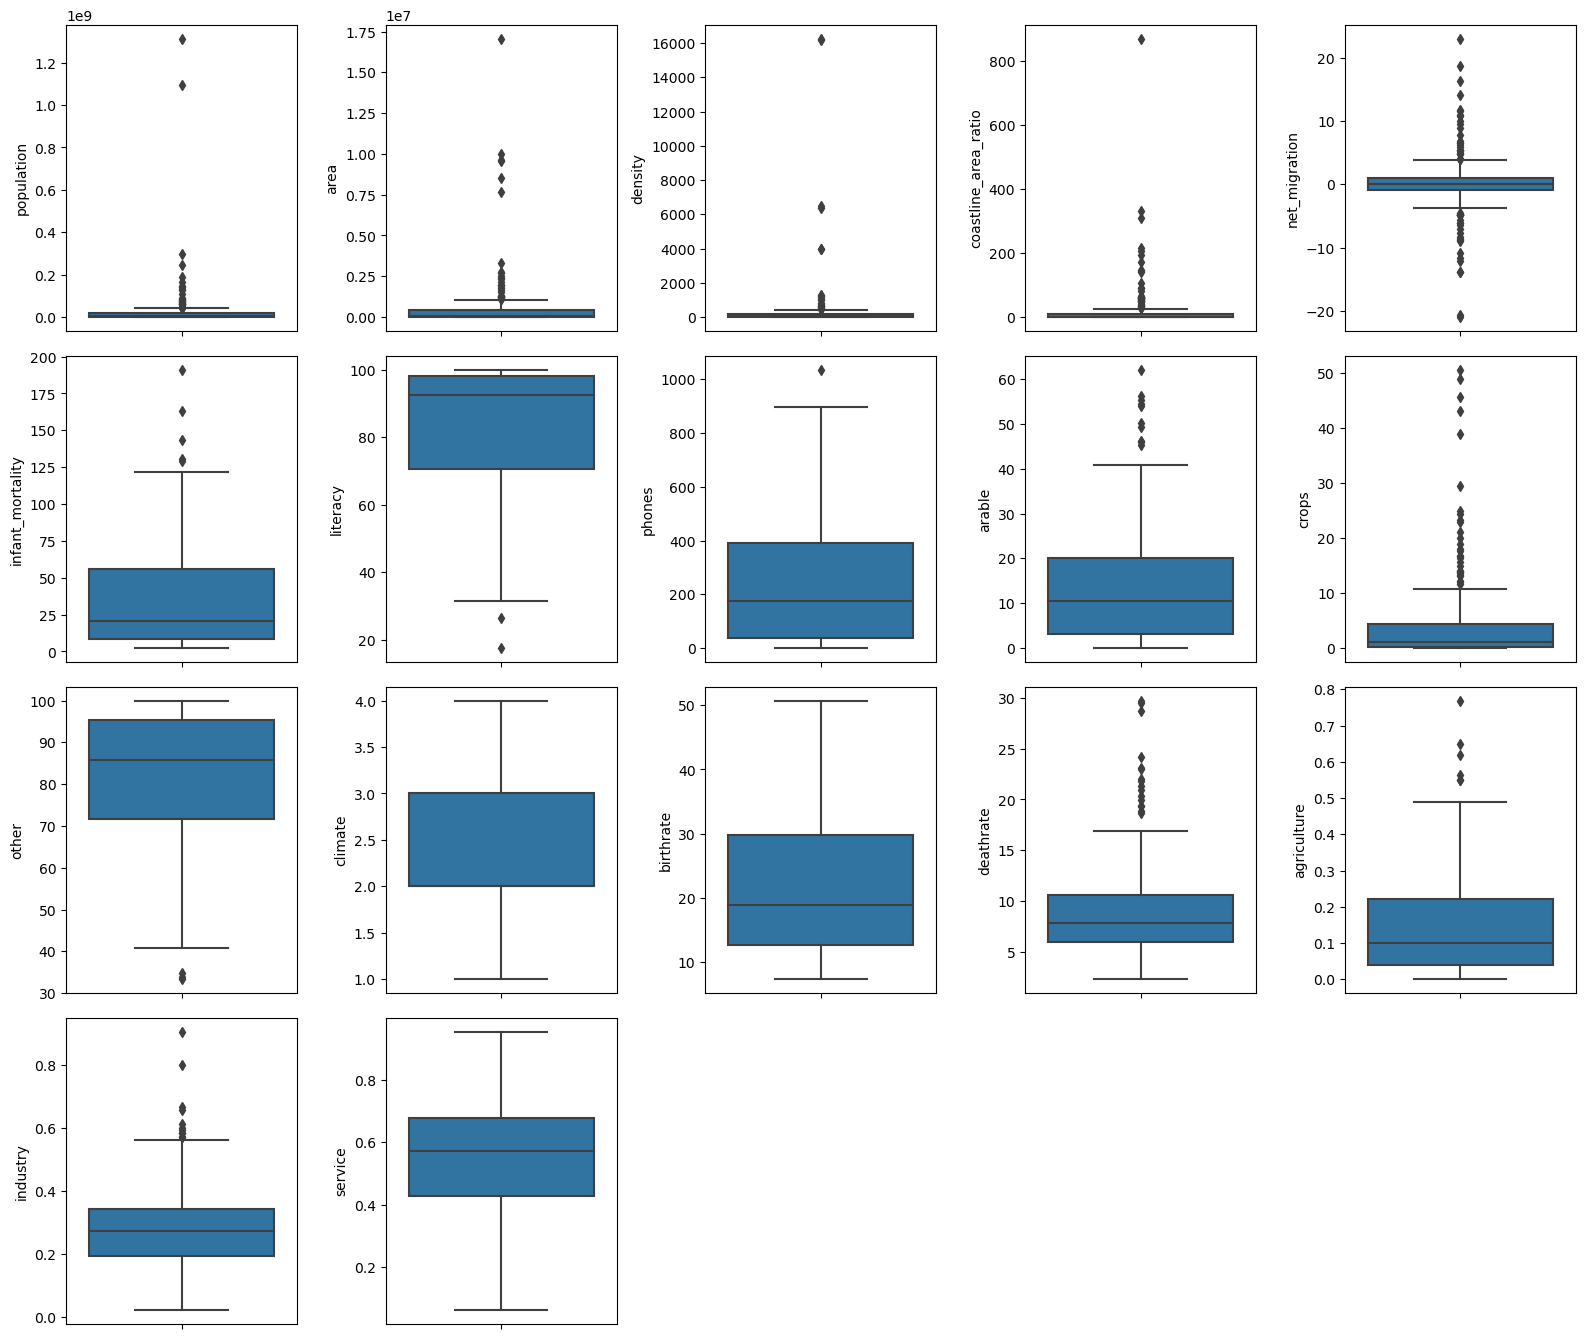

In [53]:
# Boxplots with the distribution of the features 

fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=gdp[features[i]])
plt.tight_layout()
plt.show()

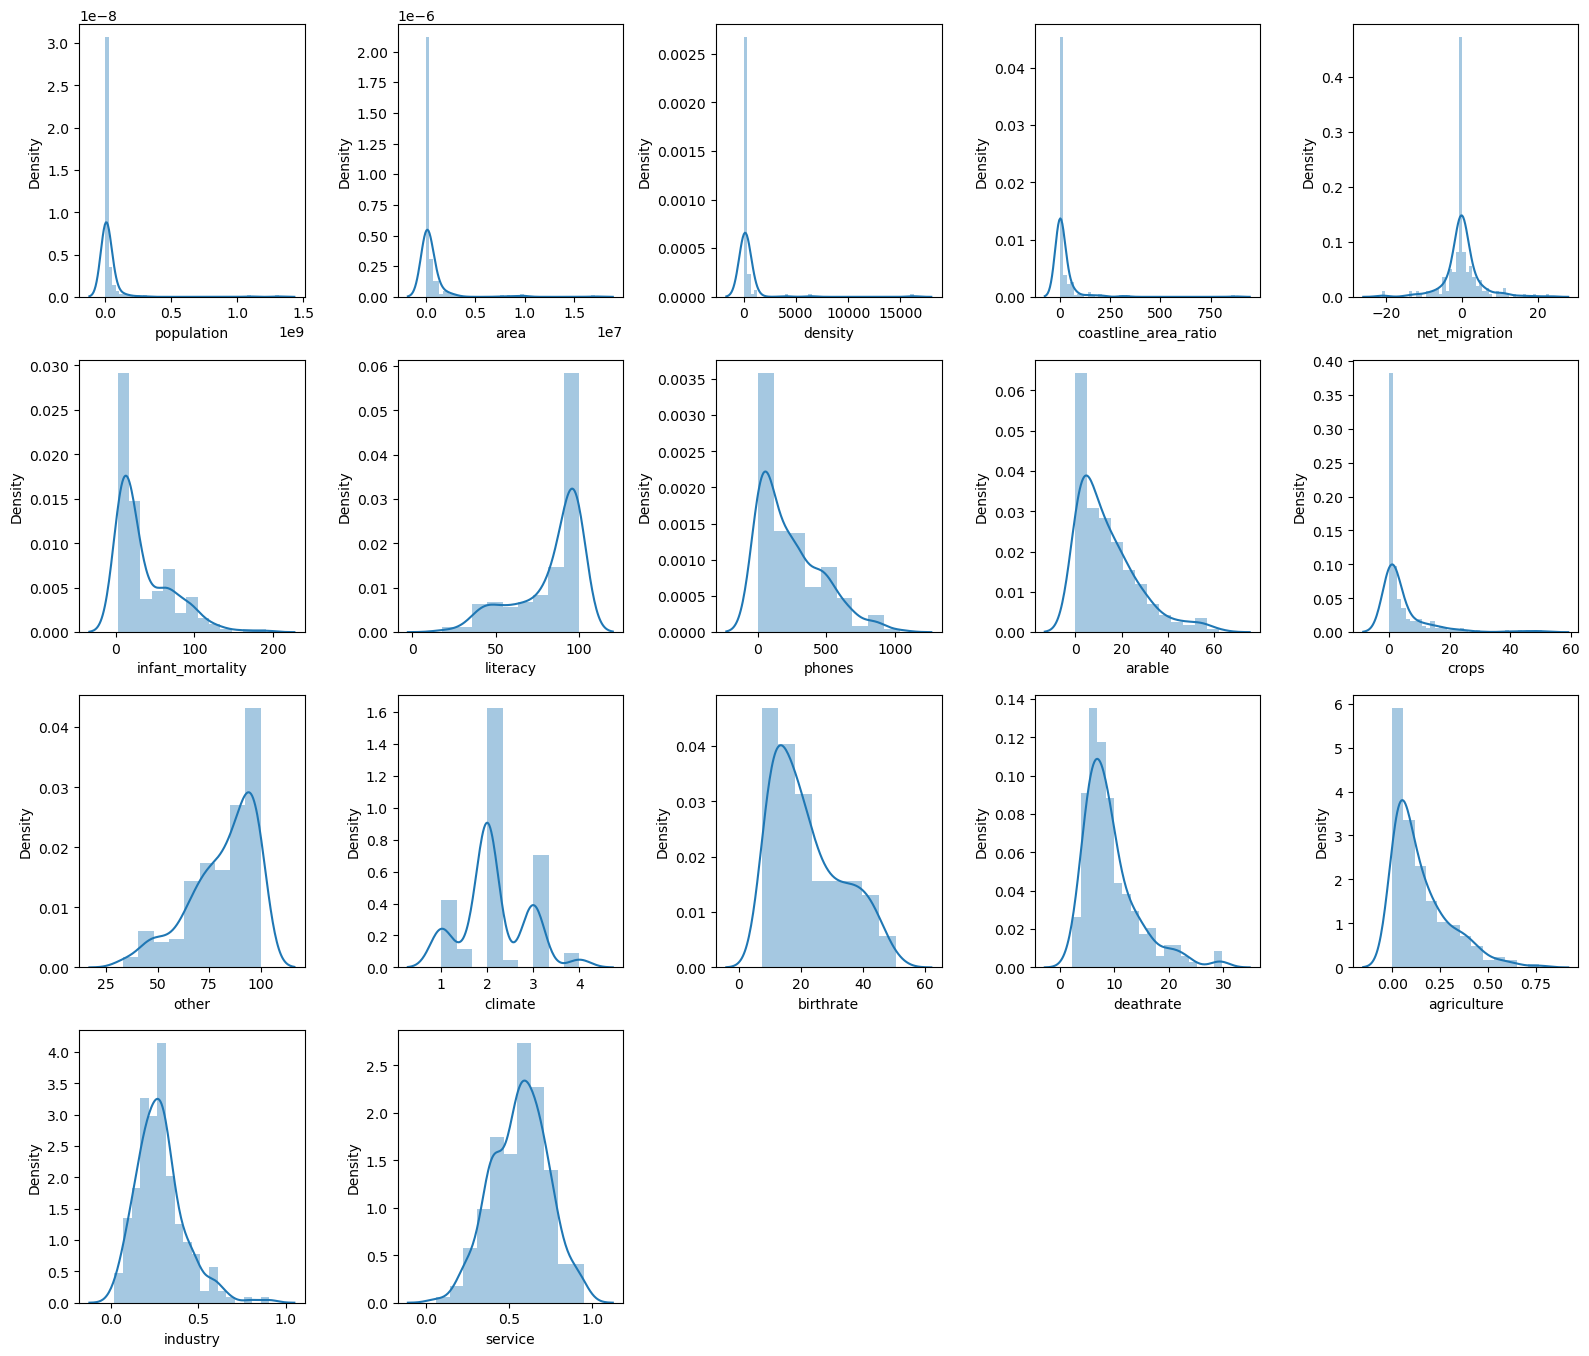

In [54]:
#  Plotting the distribution of various features in the gdp
fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(gdp[features[i]])
plt.tight_layout()
plt.show()

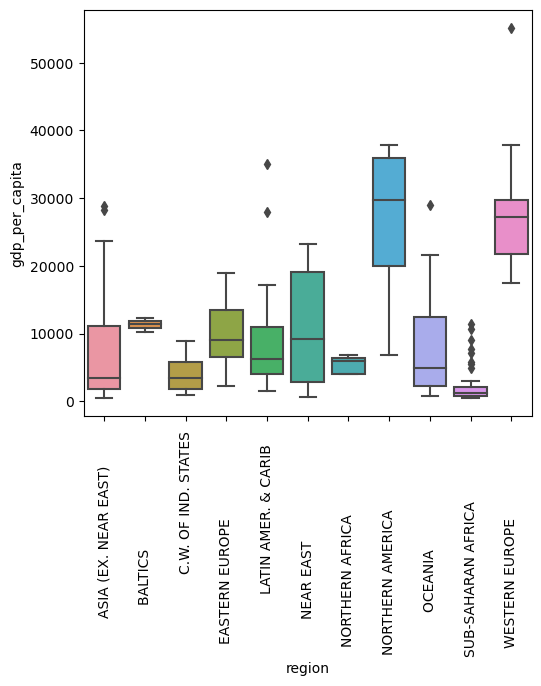

In [55]:
# Checking for outliers
sns.boxplot(y=gdp['gdp_per_capita'],x= gdp['region'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

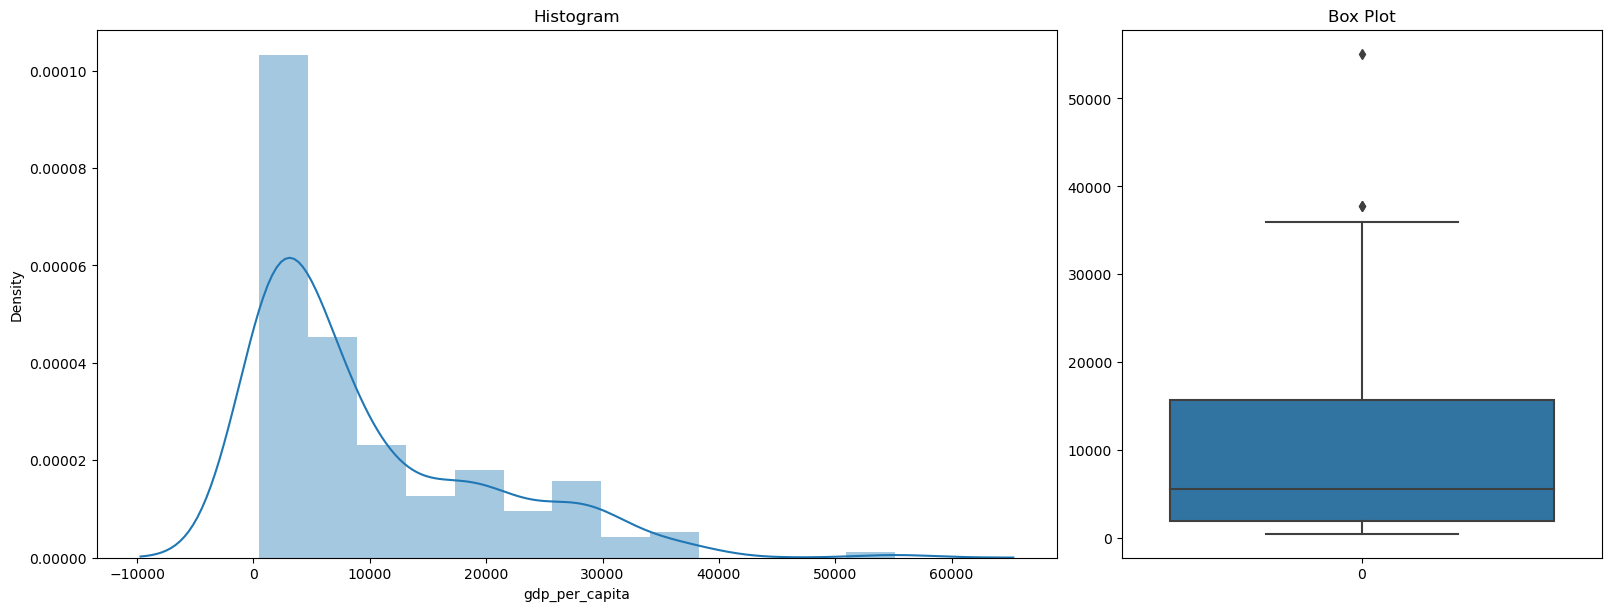

In [56]:
# checking the distribution of target value gdp per capita, and outliers
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(gdp.loc[:,'gdp_per_capita'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(gdp.loc[:,'gdp_per_capita'], orient='v', ax = ax3)
plt.show()

In [57]:
#Filling missing values in various columns of the 'gdp' dataframe with specific values or with the calculated median or mean
gdp['net_migration'].fillna(0, inplace=True)
gdp['infant_mortality'].fillna(0, inplace=True)
gdp['gdp_per_capita'].fillna(2500, inplace=True)
gdp['literacy'].fillna(gdp.groupby('region')['literacy'].transform('median'), inplace= True)
gdp['phones'].fillna(gdp.groupby('region')['phones'].transform('median'), inplace= True)
gdp['arable'].fillna(0, inplace=True)
gdp['crops'].fillna(0, inplace=True)
gdp['other'].fillna(0, inplace=True)
gdp['climate'].fillna(0, inplace=True)
gdp['birthrate'].fillna(gdp.groupby('region')['birthrate'].transform('mean'), inplace= True)
gdp['deathrate'].fillna(gdp.groupby('region')['deathrate'].transform('median'), inplace= True)
gdp['agriculture'].fillna(0.15, inplace=True)
gdp['service'].fillna(0.8, inplace=True)
gdp['industry'].fillna(0.05, inplace= True)

In [58]:
# Checking for null values
gdp.isnull().sum()

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64

In [59]:
# Checking summary description with statistics
gdp.describe().T

count          mean           std       min  \
population            227.0  2.874028e+07  1.178913e+08  7026.000   
area                  227.0  5.982270e+05  1.790282e+06     2.000   
density               227.0  3.790471e+02  1.660186e+03     0.000   
coastline_area_ratio  227.0  2.116533e+01  7.228686e+01     0.000   
net_migration         227.0  3.762115e-02  4.856712e+00   -20.990   
infant_mortality      227.0  3.503771e+01  3.538833e+01     0.000   
gdp_per_capita        227.0  9.658150e+03  1.003823e+04   500.000   
literacy              227.0  8.358811e+01  1.931583e+01    17.600   
phones                227.0  2.346284e+02  2.263903e+02     0.200   
arable                227.0  1.367555e+01  1.304672e+01     0.000   
crops                 227.0  4.524009e+00  8.335358e+00     0.000   
other                 227.0  8.091903e+01  1.779556e+01     0.000   
climate               227.0  1.931718e+00  9.185686e-01     0.000   
birthrate             227.0  2.205724e+01  1.112992e+01     7.290   
deathrate             227.0  9.196652e+00  4.964786e+00     2.290   
agriculture           227.0  1.507885e-01  1.418429e-01     0.000   
industry              227.0  2.663084e-01  1.460457e-01     0.020   
service               227.0  5.807930e-01  1.705659e-01     0.062   

                              25%          50%           75%           max  
population            437624.0000  4786994.000  1.749777e+07  1.313974e+09  
area                    4647.5000    86600.000  4.418110e+05  1.707520e+07  
density                   29.1500       78.800  1.901500e+02  1.627150e+04  
coastline_area_ratio       0.1000        0.730  1.034500e+01  8.706600e+02  
net_migration             -0.9050        0.000  9.800000e-01  2.306000e+01  
infant_mortality           7.8250       20.910  5.533500e+01  1.911900e+02  
gdp_per_capita          1900.0000     5500.000  1.570000e+04  5.510000e+04  
literacy                  75.3000       92.600  9.800000e+01  1.000000e+02  
phones                    38.5000      176.200  3.829000e+02  1.035600e+03  
arable                     3.0950       10.380  2.000000e+01  6.211000e+01  
crops                      0.1900        1.010  4.435000e+00  5.068000e+01  
other                     70.8750       85.380  9.523000e+01  1.000000e+02  
climate                    1.5000        2.000  2.250000e+00  4.000000e+00  
birthrate                 12.6350       18.790  2.977000e+01  5.073000e+01  
deathrate                  5.7950        7.840  1.058000e+01  2.974000e+01  
agriculture                0.0400        0.116  2.110000e-01  7.690000e-01  
industry                   0.1700        0.259  3.350000e-01  9.060000e-01  
service                    0.4435        0.583  6.995000e-01  9.540000e-01

In [60]:
# Printing the dataset
gdp

country                               region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA                               
12                            Austria   WESTERN EUROPE                        
13                         Azerbaijan                  C.W. OF IND. STATES    
14                       Bahamas, The               LATIN AMER. & CARIB       
15                            Bahrain   NEAR EAST                             
16                         Bangladesh         ASIA (EX. NEAR EAST)            
17                           Barbados               LATIN AMER. & CARIB       
18                            Belarus                  C.W. OF IND. STATES    
19                            Belgium   WESTERN EUROPE                        
20                             Belize               LATIN AMER. & CARIB       
21                              Benin   SUB-SAHARAN AFRICA                    
22                            Bermuda   NORTHERN AMERICA                      
23                             Bhutan         ASIA (EX. NEAR EAST)            
24                            Bolivia               LATIN AMER. & CARIB       
25               Bosnia & Herzegovina   EASTERN EUROPE                        
26                           Botswana   SUB-SAHARAN AFRICA                    
27                             Brazil               LATIN AMER. & CARIB       
28                 British Virgin Is.               LATIN AMER. & CARIB       
29                             Brunei         ASIA (EX. NEAR EAST)            
30                           Bulgaria   EASTERN EUROPE                        
31                       Burkina Faso   SUB-SAHARAN AFRICA                    
32                              Burma         ASIA (EX. NEAR EAST)            
33                            Burundi   SUB-SAHARAN AFRICA                    
34                           Cambodia         ASIA (EX. NEAR EAST)            
35                           Cameroon   SUB-SAHARAN AFRICA                    
36                             Canada   NORTHERN AMERICA                      
37                         Cape Verde   SUB-SAHARAN AFRICA                    
38                     Cayman Islands               LATIN AMER. & CARIB       
39               Central African Rep.   SUB-SAHARAN AFRICA                    
40                               Chad   SUB-SAHARAN AFRICA                    
41                              Chile               LATIN AMER. & CARIB       
42                              China         ASIA (EX. NEAR EAST)            
43                           Colombia               LATIN AMER. & CARIB       
44                            Comoros   SUB-SAHARAN AFRICA                    
45                   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                    
46               Congo, Repub. of the   SUB-SAHARAN AFRICA                    
47                       Cook Islands   OCEANIA                               
48                         Costa Rica               LATIN AMER. & CARIB       
49                      Cote d'Ivoire   SUB-SAHARAN AFRICA                    
50

In [61]:
# Exctracting the dataset clean
gdp.to_excel('gdp_clean.xlsx', index=False)

In [62]:
# Map graph with the gdp per country of each world
import plotly.graph_objs as go
from plotly.offline import iplot
z = dict(type='choropleth',
locations = gdp.country,
locationmode = 'country names', z = gdp.gdp_per_capita,
text = gdp.country, colorbar = {'title':'GDP per Capita'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP per Capita of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [z],layout = layout)
iplot(choromap,validate=False)

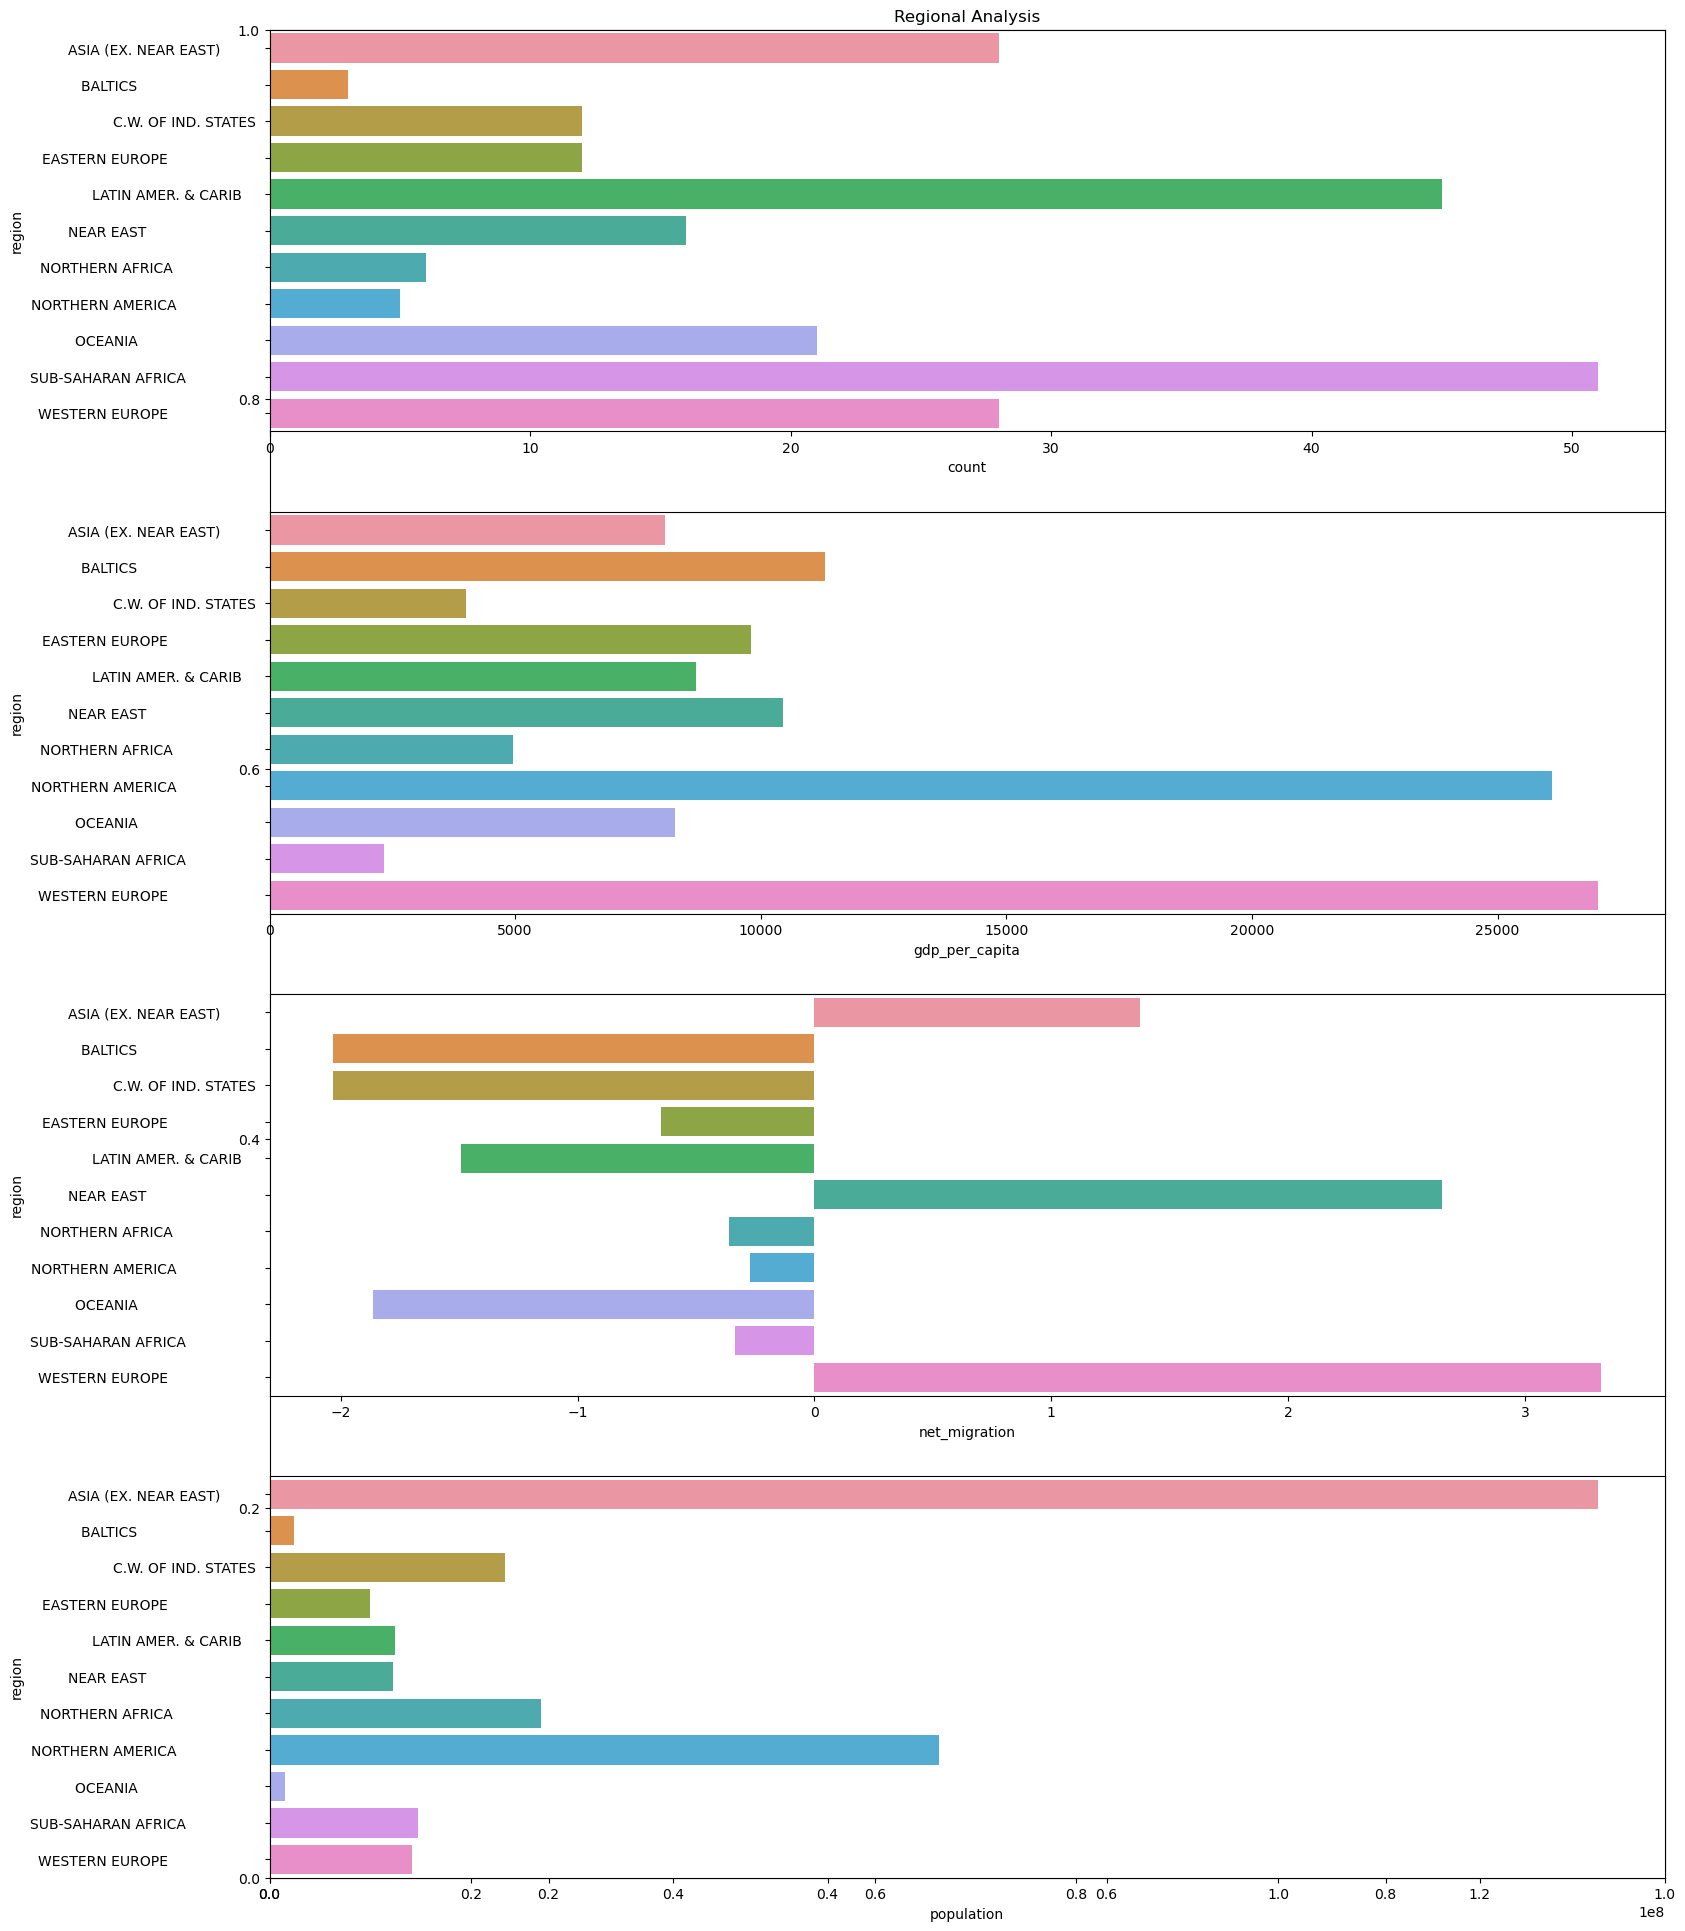

In [63]:
# Analysis of GDP per capita, net migration, and population across different regions
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= gdp, y= 'region', ax= ax1)
sns.barplot(data= gdp, y= 'region', x= 'gdp_per_capita', ax= ax2, ci= None)
sns.barplot(data= gdp, y= 'region', x= 'net_migration', ax= ax3, ci= None)
sns.barplot(data= gdp, y= 'region', x= 'population', ax= ax4, ci= None)
plt.show()

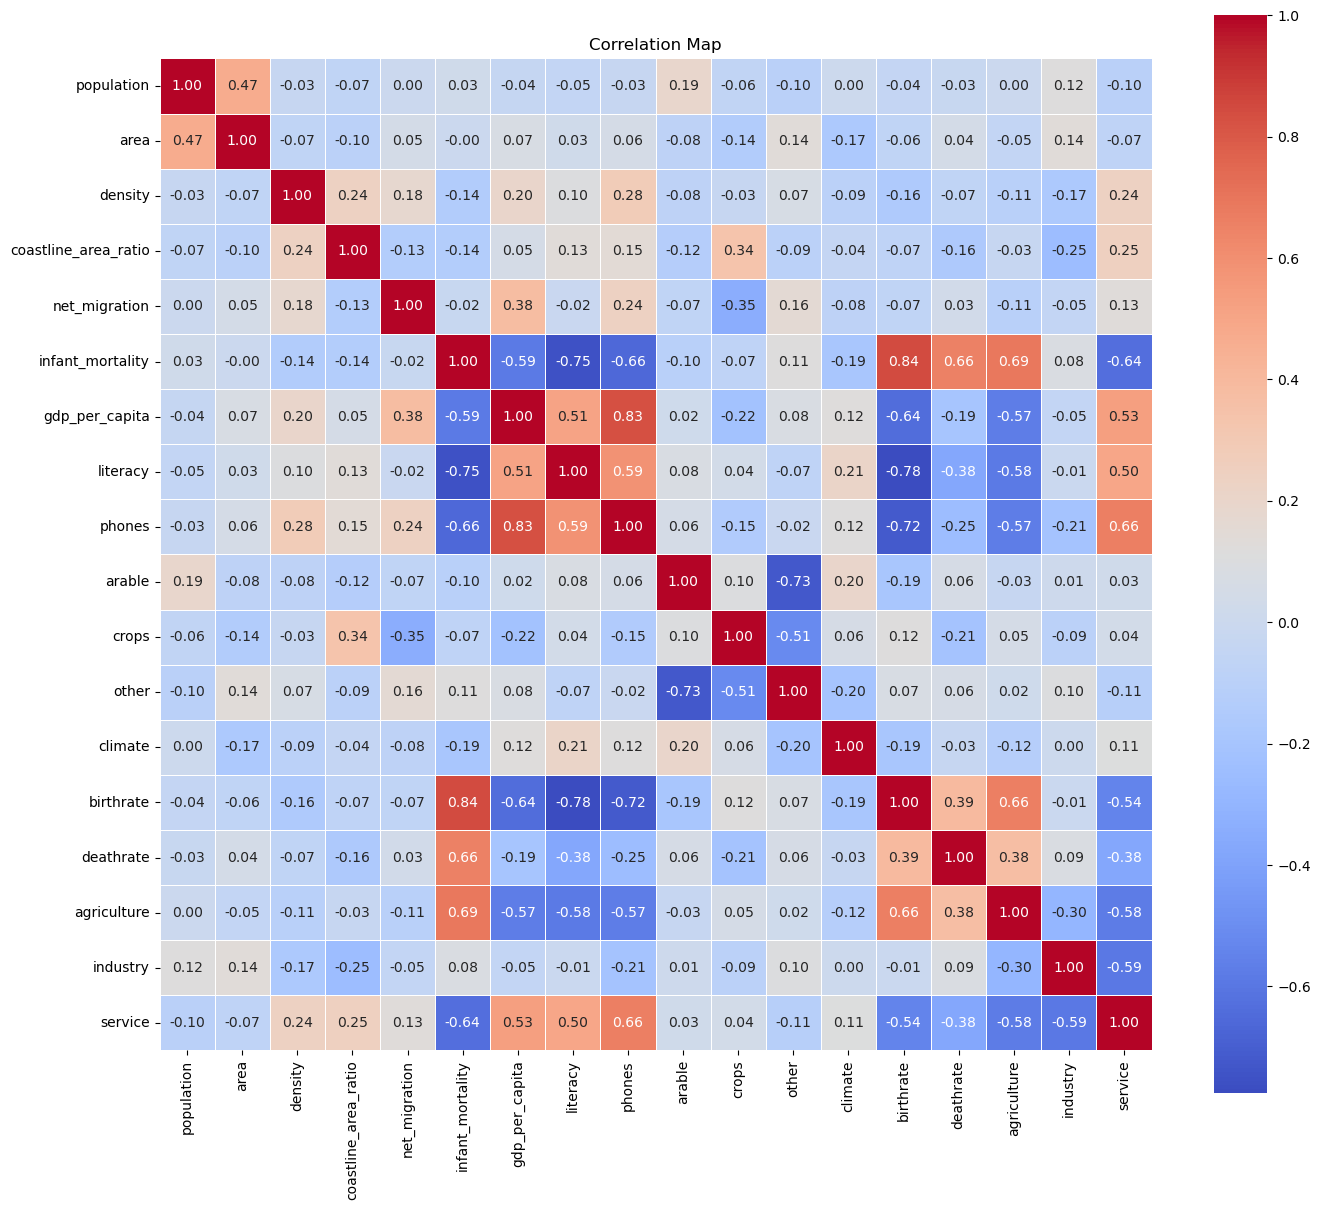

In [64]:
# Correlation matrix to understand the correlations of the features 
correlation_matrix = gdp.drop(columns=['country','region']).corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Map')
plt.show()

In [65]:
# Checking the features of the dataset
gdp.columns

Index(['country', 'region', 'population', 'area', 'density',
       'coastline_area_ratio', 'net_migration', 'infant_mortality',
       'gdp_per_capita', 'literacy', 'phones', 'arable', 'crops', 'other',
       'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

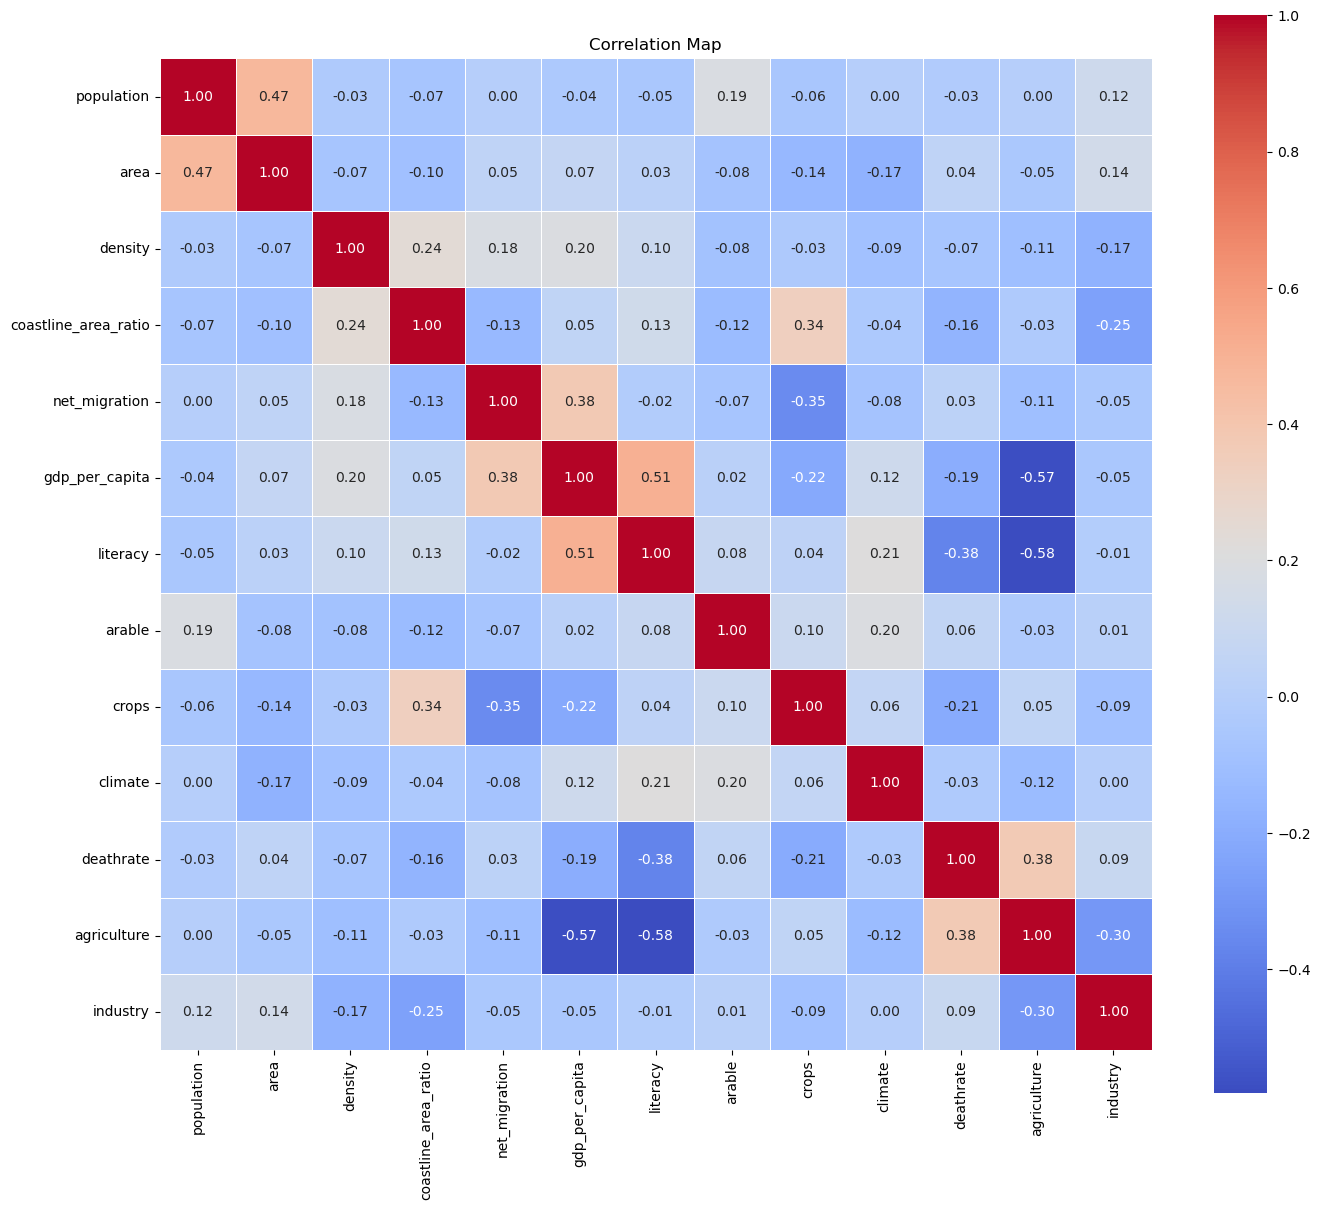

In [66]:
# Second correlatin matrix 
correlation_matrix_2 = gdp.drop(columns=['country','region','infant_mortality','birthrate','phones','other','service']).corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Map')
plt.show()

In [67]:
# Definition of the X and the y axis
columns_to_drop = ['country','gdp_per_capita','region']
X = gdp.drop(columns=columns_to_drop)
y = gdp['gdp_per_capita']

In [68]:
# Train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Testing  the LR model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

In [70]:
# Printing the predictions
predictions_lr

array([ 7554.80176674,  6097.07230865, 12493.52717538,   489.83958945,
       13713.20183805,  6742.52875651,  9385.01374578,  4217.2314868 ,
       -1378.02201927, 11660.67777182, 30826.72384263,   436.97202788,
        6552.08212016, 19821.29077167, 12665.59344156,  8585.59626266,
       10871.12128302, -2408.36118612,  1378.97381251,  3607.77490967,
        1418.02466545, 25732.52487384,  1993.78697411,  4880.18912067,
       16595.04945217, 16785.56911138,  1542.98944563,  5204.82105214,
       15068.251283  ,  7266.27302594, 11627.0745981 ,  2078.72218489,
       23822.60622709, -1110.44205527,  3104.30042325,  6608.71535636,
        6959.05703292,   399.5151125 , 19928.61436377,  -337.12981131,
       17381.50824544,  1503.53360382,  8918.64831764, 23124.36998288,
       16881.55680017, 25771.49942729])

In [71]:
# Testing  the RF model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

In [72]:
# Printing the predictions
predictions_rf

array([ 4928.,  2930., 15110.,  1012.,  8455.,  4233.,  5086.,  3294.,
         876.,  6004., 21687.,  4082.,  4857., 31723.,  7906.,  4891.,
       12684.,   743.,  1142.,  3344.,  1459., 31552.,  1222.,  4462.,
        9623., 22564.,  1402.,  2752., 17888.,  2490.,  7495.,  1431.,
       20389.,  1999.,  3636.,  4574.,  5547.,  1406., 28885.,  1094.,
       16765.,  1091., 10380., 24356., 15644., 24282.])

In [73]:
# Testing  the GB model
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
predictions_gb = model_gb.predict(X_test)

In [74]:
# Printing the predictions
predictions_gb

array([ 5105.25803138,  3341.32406601, 16171.24006433,  1159.11052427,
       13062.62914817,  3055.93365126,  4369.81028739,  2732.89629391,
         829.19157937,  6280.61561332, 22931.17648255,  3528.77262257,
        3707.27724608, 32644.55861615,  6477.26193638,  4476.15739238,
       11616.65974945,   667.14264158,  1332.52651469,  2888.99963143,
        1910.2091218 , 26768.97012802,  1918.6476757 ,  3810.99874004,
        9247.3032442 , 20589.38030016,  1303.07044811,  3121.57119861,
       14618.91462932,  2511.455533  ,  7041.67689416,   929.12397014,
       19105.46761911,  1871.98135809,  2706.71346141,  4596.32895039,
        4002.95924108,  2303.49262827, 26663.9723602 ,   872.40817691,
       17940.66182699,  1817.47665116,  7195.36887325, 24821.17705706,
       17268.52799062, 24517.7753125 ])

In [75]:
# Evaluating the LR model
mae_lr = mean_absolute_error(y_test, predictions_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

In [76]:
# Evaluating the RF model
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

In [77]:
# Evaluating the GB model
mae_gb = mean_absolute_error(y_test, predictions_gb)
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

In [78]:
# printing the evaluations of the models
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, predictions_gb))

print("Linear Regression Metrics:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

print("\nRandom Forest Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

print("\nGradient Boosting Metrics:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

Linear Regression Metrics:
Mean Absolute Error: 3275.220422372516
Mean Squared Error: 19723837.017137103
Root Mean Squared Error: 4441.152667623249
R-squared: 0.7628078577097286

Random Forest Metrics:
Mean Absolute Error: 2135.5434782608695
Mean Squared Error: 10703418.195652174
Root Mean Squared Error: 3271.6078914888585
R-squared: 0.8712843403923082

Gradient Boosting Metrics:
Mean Absolute Error: 2085.129793762874
Mean Squared Error: 9130866.64561241
Root Mean Squared Error: 3021.73239146229
R-squared: 0.8901953094239291


In [79]:
# Applying the GB Model
model_gb = GradientBoostingRegressor()
model_gb.fit(X, y)
predictions_gb = model_gb.predict(X)

In [80]:
# Printing the predictions of the GB model 
predictions_gb

array([  952.07933876,  3200.43561413,  6006.06249522,  7603.14545868,
       20017.13635391,  2283.31463529,  9092.08911881, 10423.05673056,
       10249.39528594,  4114.3967478 , 26198.20141522, 28516.96666986,
       29572.48179018,  3845.67018878, 16524.8135326 , 16366.93288337,
        2128.9015575 , 15129.62282773,  7645.90844031, 28453.79336823,
        4396.95479754,   921.68663602, 35051.0525163 ,  1509.89406788,
        3739.50033602,  6125.13336276,  9595.88412081,  7700.06946357,
       17235.39262058, 17229.16769277,  6987.93868377,   804.97908313,
        2066.26883176,   751.21103944,  2473.72872143,  1101.45878458,
       29619.09116934,  2041.53235092, 34719.1597401 ,  1016.32541019,
        1060.28103298, 10827.31758538,  5719.712513  ,  5363.55480274,
         836.97867821,   813.64228765,  1775.66482371,  5458.91383817,
        9453.58147937,  1136.08553997, 13546.24387097,  4324.31738455,
       17243.4538552 , 14787.76016934, 31774.37417953,  1149.49305609,
      

In [81]:
# Adding a new column named 2024 with the predicions of 2024
gdp['2024'] = predictions_gb
gdp

country                               region  \
0                         Afghanistan         ASIA (EX. NEAR EAST)            
1                             Albania   EASTERN EUROPE                        
2                             Algeria   NORTHERN AFRICA                       
3                      American Samoa   OCEANIA                               
4                             Andorra   WESTERN EUROPE                        
5                              Angola   SUB-SAHARAN AFRICA                    
6                            Anguilla               LATIN AMER. & CARIB       
7                   Antigua & Barbuda               LATIN AMER. & CARIB       
8                           Argentina               LATIN AMER. & CARIB       
9                             Armenia                  C.W. OF IND. STATES    
10                              Aruba               LATIN AMER. & CARIB       
11                          Australia   OCEANIA                               
12                            Austria   WESTERN EUROPE                        
13                         Azerbaijan                  C.W. OF IND. STATES    
14                       Bahamas, The               LATIN AMER. & CARIB       
15                            Bahrain   NEAR EAST                             
16                         Bangladesh         ASIA (EX. NEAR EAST)            
17                           Barbados               LATIN AMER. & CARIB       
18                            Belarus                  C.W. OF IND. STATES    
19                            Belgium   WESTERN EUROPE                        
20                             Belize               LATIN AMER. & CARIB       
21                              Benin   SUB-SAHARAN AFRICA                    
22                            Bermuda   NORTHERN AMERICA                      
23                             Bhutan         ASIA (EX. NEAR EAST)            
24                            Bolivia               LATIN AMER. & CARIB       
25               Bosnia & Herzegovina   EASTERN EUROPE                        
26                           Botswana   SUB-SAHARAN AFRICA                    
27                             Brazil               LATIN AMER. & CARIB       
28                 British Virgin Is.               LATIN AMER. & CARIB       
29                             Brunei         ASIA (EX. NEAR EAST)            
30                           Bulgaria   EASTERN EUROPE                        
31                       Burkina Faso   SUB-SAHARAN AFRICA                    
32                              Burma         ASIA (EX. NEAR EAST)            
33                            Burundi   SUB-SAHARAN AFRICA                    
34                           Cambodia         ASIA (EX. NEAR EAST)            
35                           Cameroon   SUB-SAHARAN AFRICA                    
36                             Canada   NORTHERN AMERICA                      
37                         Cape Verde   SUB-SAHARAN AFRICA                    
38                     Cayman Islands               LATIN AMER. & CARIB       
39               Central African Rep.   SUB-SAHARAN AFRICA                    
40                               Chad   SUB-SAHARAN AFRICA                    
41                              Chile               LATIN AMER. & CARIB       
42                              China         ASIA (EX. NEAR EAST)            
43                           Colombia               LATIN AMER. & CARIB       
44                            Comoros   SUB-SAHARAN AFRICA                    
45                   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                    
46               Congo, Repub. of the   SUB-SAHARAN AFRICA                    
47                       Cook Islands   OCEANIA                               
48                         Costa Rica               LATIN AMER. & CARIB       
49                      Cote d'Ivoire   SUB-SAHARAN AFRICA                    
50

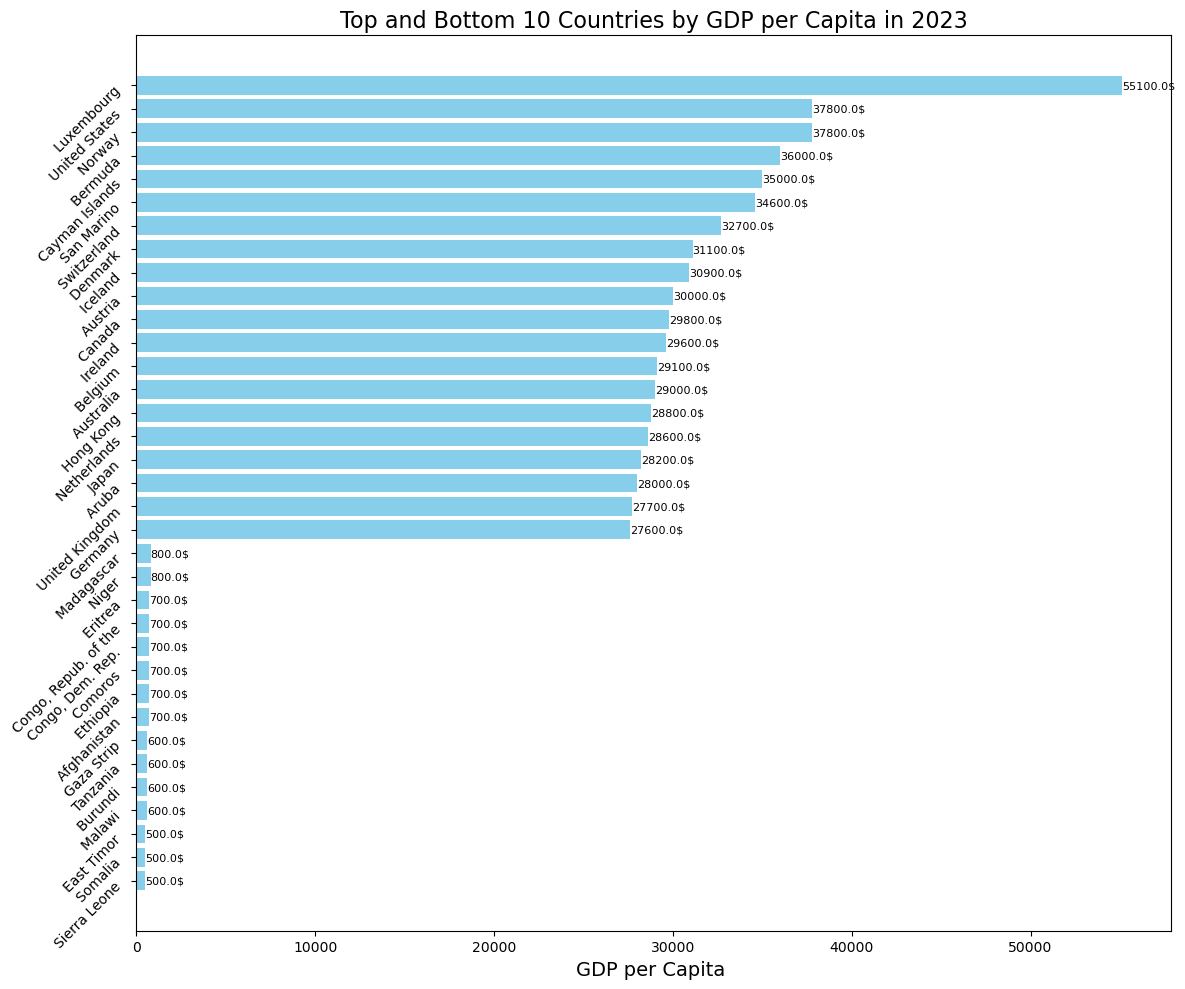

In [82]:
# Plotting the top 10 and bottom of 2023
gdp.sort_values(by="gdp_per_capita", ascending=False, inplace=True)
top_bottom_10 = pd.concat([gdp.head(20), gdp.tail(15)])
plt.figure(figsize=(12, 10))
bars = plt.barh(top_bottom_10['country'], top_bottom_10['gdp_per_capita'], color='skyblue')


plt.xlabel('GDP per Capita ', fontsize=14)
plt.title('Top and Bottom 10 Countries by GDP per Capita in 2023', fontsize=16)
plt.gca().invert_yaxis()  


plt.yticks(fontsize=10, rotation=45)


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.1f}$'.format(width), ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('GDP_2023.png')
plt.show()

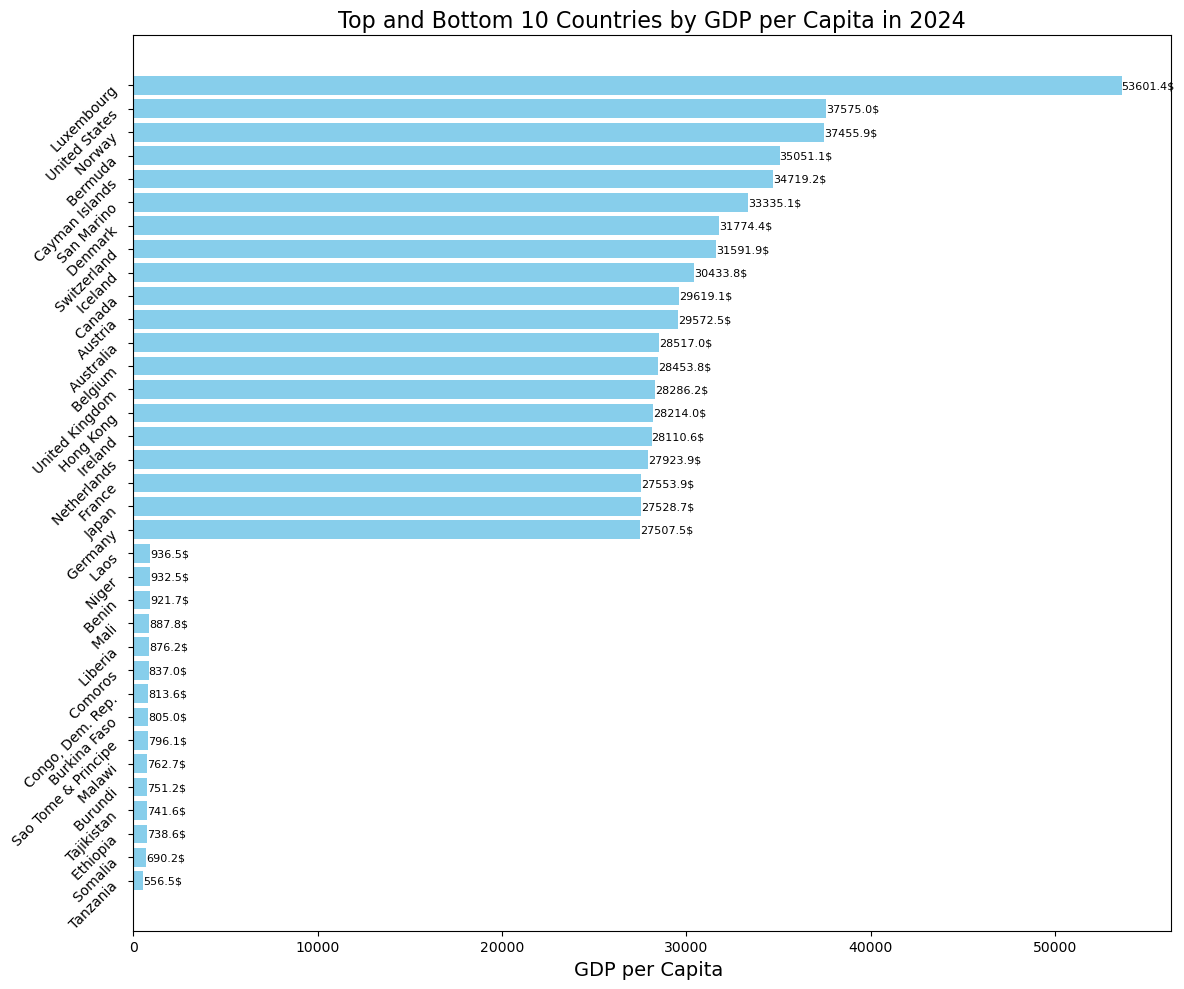

In [83]:
# Plotting the top 10 and bottom of 2024
gdp.sort_values(by="2024", ascending=False, inplace=True)
top_bottom_10 = pd.concat([gdp.head(20), gdp.tail(15)])
plt.figure(figsize=(12, 10))
bars = plt.barh(top_bottom_10['country'], top_bottom_10['2024'], color='skyblue')


plt.xlabel('GDP per Capita ', fontsize=14)
plt.title('Top and Bottom 10 Countries by GDP per Capita in 2024', fontsize=16)
plt.gca().invert_yaxis()  


plt.yticks(fontsize=10, rotation=45)


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.1f}$'.format(width), ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('GDP_Pred_2024.png')
plt.show()

In [84]:
# Extracting the dataset with the predictions of 2024
gdp.to_excel('gdp_pred.xlsx', index=False)